In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

#import tensorflow as tf
#from keras.utils.np_utils import to_categorical
#from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

Exploratory Data Analysis


In [3]:
image_dir = "/scratch/xxsi3290/Kaggle/jpeg/jpeg/"

In [4]:
dicom_data = pd.read_csv('/scratch/xxsi3290/Kaggle/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
dicom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
# check image types in dataset
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
meta_data = pd.read_csv('/scratch/xxsi3290/Kaggle/meta.csv')
meta_data.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [8]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


In [9]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [10]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [11]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [12]:
#cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg/', image_dir, regex=True))
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#cropped_images.head()

full_mammogram_images = full_mammogram_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#full_mammogram_images.head()

ROI_mask_images = ROI_mask_images.replace('CBIS-DDSM/jpeg/', image_dir, regex=True)
#ROI_mask_images.head()

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammogram_images.iloc[0])
print('ROI Mask Images paths:\n')
print(ROI_mask_images.iloc[0])

Cropped Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [13]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[6]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[6]
    cropped_images_dict[key] = dicom
for dicom in ROI_mask_images:
    key = dicom.split("/")[6]
    roi_img_dict[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

Image visualisation - Full mammogram && ROI mask

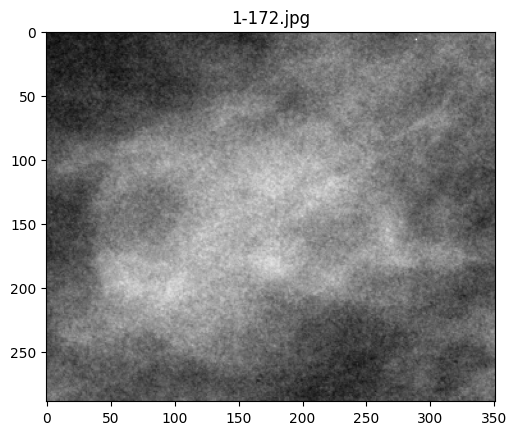

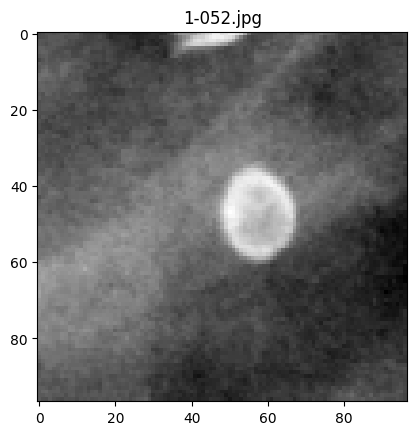

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg


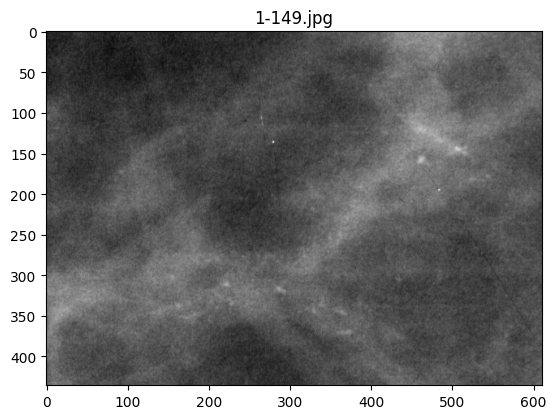

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg
File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/1-085.jpg


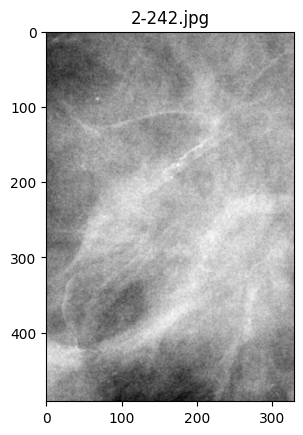

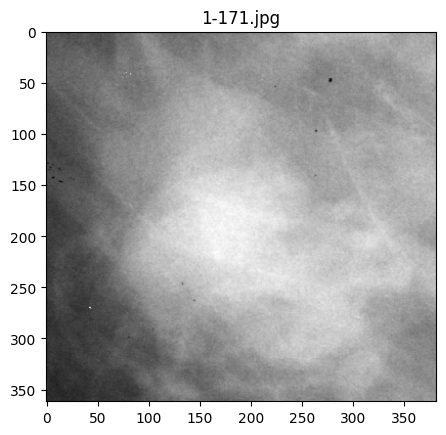

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281604745510897859806968805740602385667/1-111.jpg


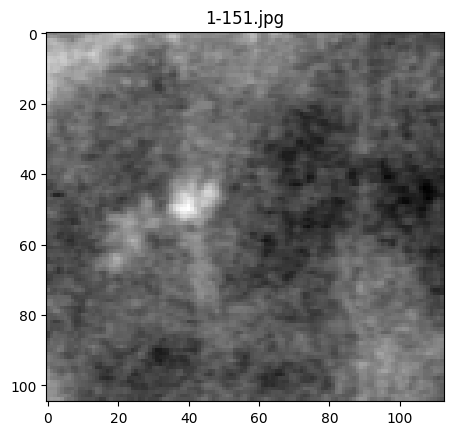

In [14]:
import matplotlib.pyplot as plt 
import glob
import PIL
import random

for file in cropped_images[0:10]:
    try:
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue  # Skip to the next file
        cropped_images_show = PIL.Image.open(file)
        gray_img = cropped_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue

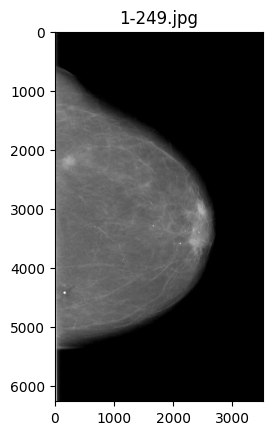

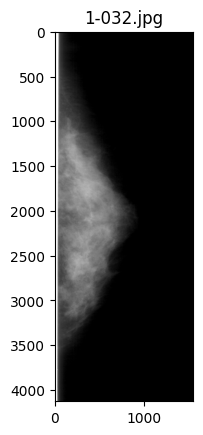

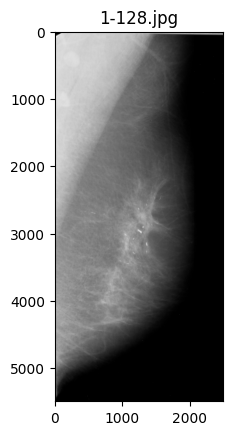

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg


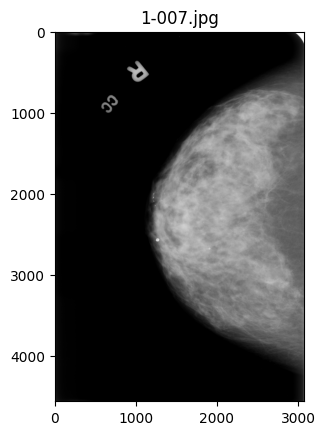

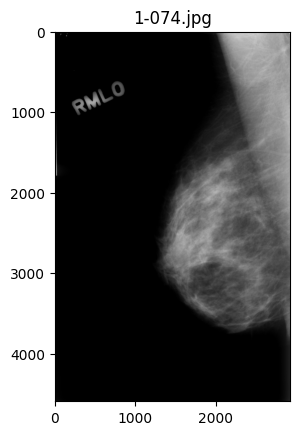

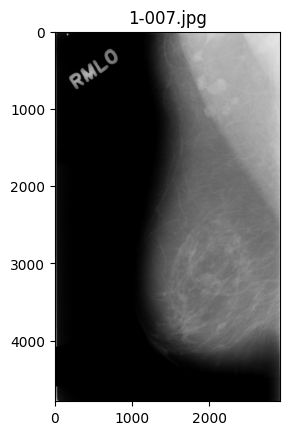

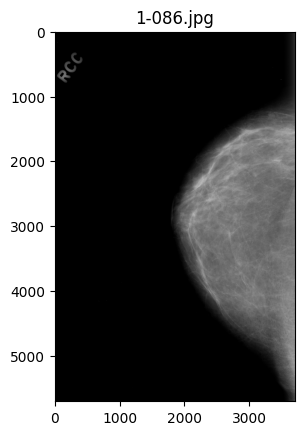

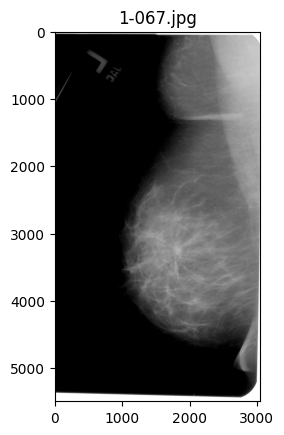

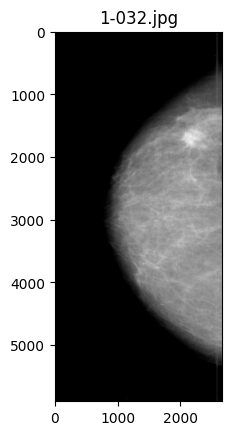

In [15]:
import os
import PIL
import matplotlib.pyplot as plt

for file  in full_mammogram_images[0:10]:
    try:
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue
        full_mammogram_images_show = PIL.Image.open(file)
        gray_img= full_mammogram_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


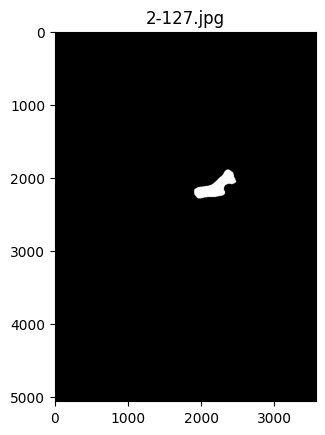

File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg
File not found: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg


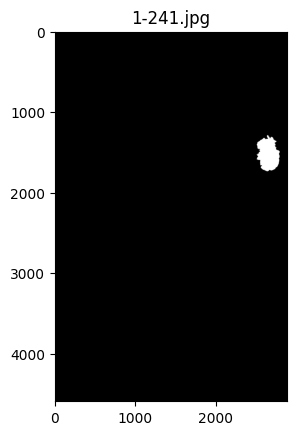

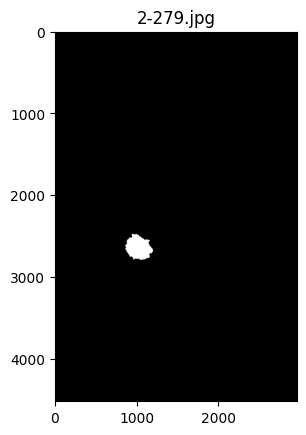

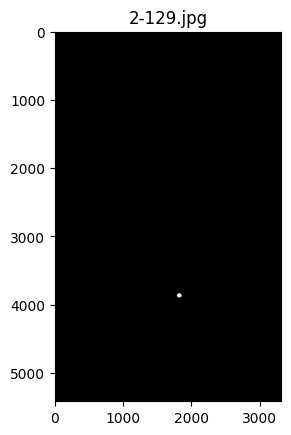

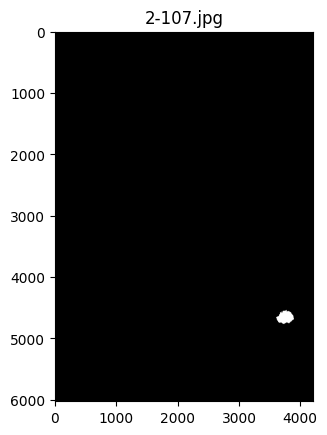

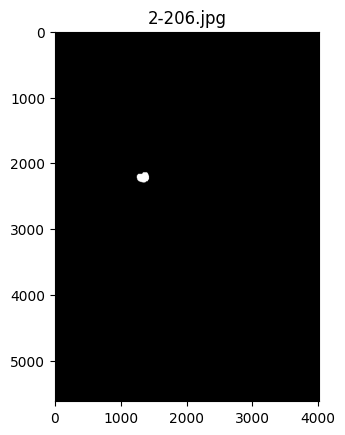

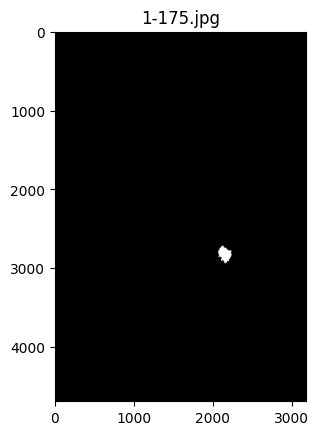

In [16]:
import os
import PIL
import matplotlib.pyplot as plt

for file in ROI_mask_images[0:10]:
    try:
        if not os.path.exists(file):  
            print(f"File not found: {file}")
            continue
        ROI_mask_images_show = PIL.Image.open(file)
        gray_img = ROI_mask_images_show.convert("L")
        plt.imshow(gray_img, cmap='gray')
        plt.title(os.path.basename(file))
        plt.show()
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue


Data Cleaning - Calcification && Mass

In [17]:
calc_train_df = pd.read_csv('/scratch/xxsi3290/Kaggle/calc_case_description_train_set.csv')
calc_test_df = pd.read_csv('/scratch/xxsi3290/Kaggle/calc_case_description_test_set.csv')

calc_train_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammo_dict:
            dataset.iloc[i, 11] = full_mammo_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_images_dict:
            dataset.iloc[i, 12] = cropped_images_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_img_dict:
            dataset.iloc[i, 13] = roi_img_dict[img_name]

fix_image_path_calc(calc_train_df)
fix_image_path_calc(calc_test_df)

In [19]:
# check unique values in pathology column
calc_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [20]:
mass_train_df = pd.read_csv('/scratch/xxsi3290/Kaggle/mass_case_description_train_set.csv')
mass_test_df = pd.read_csv('/scratch/xxsi3290/Kaggle/mass_case_description_test_set.csv')

mass_train_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [21]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammo_dict:
            dataset.iloc[i, 11] = full_mammo_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_images_dict:
            dataset.iloc[i, 12] = cropped_images_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_img_dict:
            dataset.iloc[i, 13] = roi_img_dict[img_name]

fix_image_path_mass(mass_train_df)
fix_image_path_mass(mass_test_df)

In [22]:
mass_train_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [23]:
mass_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [24]:
# rename columns
mass_train_df = mass_train_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train_df.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...


In [25]:
# check for null values
mass_train_df.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [26]:
# fill in missing values using the backwards fill method
mass_train_df['mass_shape'] = mass_train_df['mass_shape'].bfill()
mass_train_df['mass_margins'] = mass_train_df['mass_margins'].bfill()

#check null values
mass_train_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [27]:
# quantitative summary of features
mass_train_df.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [28]:
# view mass_test
mass_test_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...,/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1...


In [29]:
# check datasets shape
print(f'Shape of mass_train: {mass_train_df.shape}')
print(f'Shape of mass_test: {mass_test_df.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [30]:
mass_test_df.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [31]:
mass_test_df = mass_test_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [32]:
# fill in missing values using the backwards fill method
mass_test_df['mass_margins'] = mass_test_df['mass_margins'].bfill()

#check null values
mass_test_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# create function to display images
def display_images(column, number):
    valid_rows = []

    # First, collect only valid image paths
    for _, row in mass_train_df.iterrows():
        image_path = row[column]
        if os.path.exists(image_path):
            valid_rows.append(row)
        if len(valid_rows) == number:
            break

    # Create subplots
    cols = len(valid_rows)
    fig, axes = plt.subplots(1, cols, figsize=(5 * cols, 5))

    # If only one image is found, axes is not iterable
    if cols == 1:
        axes = [axes]

    # Loop through and display images
    for i, row in enumerate(valid_rows):
        image_path = row[column]
        try:
            image = mpimg.imread(image_path)
            axes[i].imshow(image, cmap='gray')
            axes[i].set_title(f"{row['pathology']}")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading {image_path}: {e}")
            continue

    plt.tight_layout()
    plt.show()


Full Mammograms:



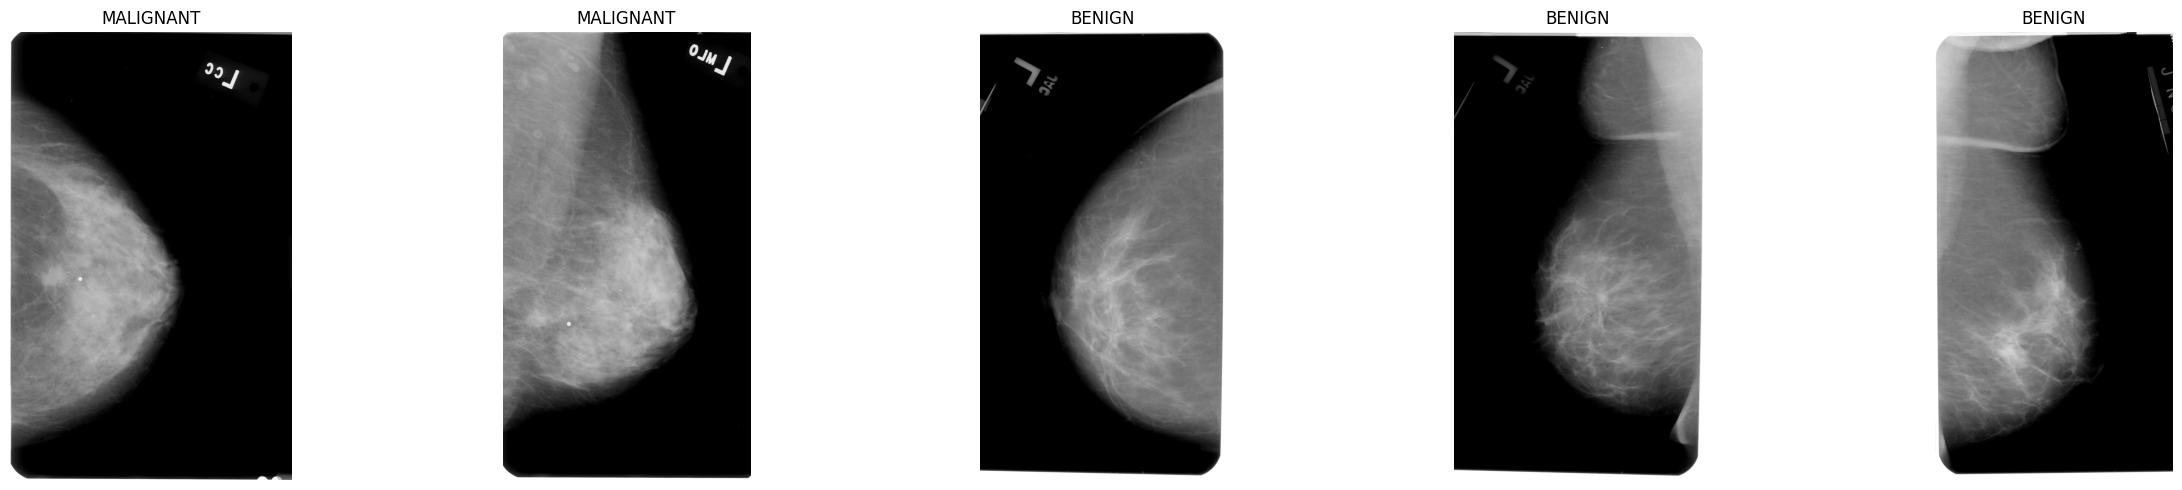

Cropped Mammograms:



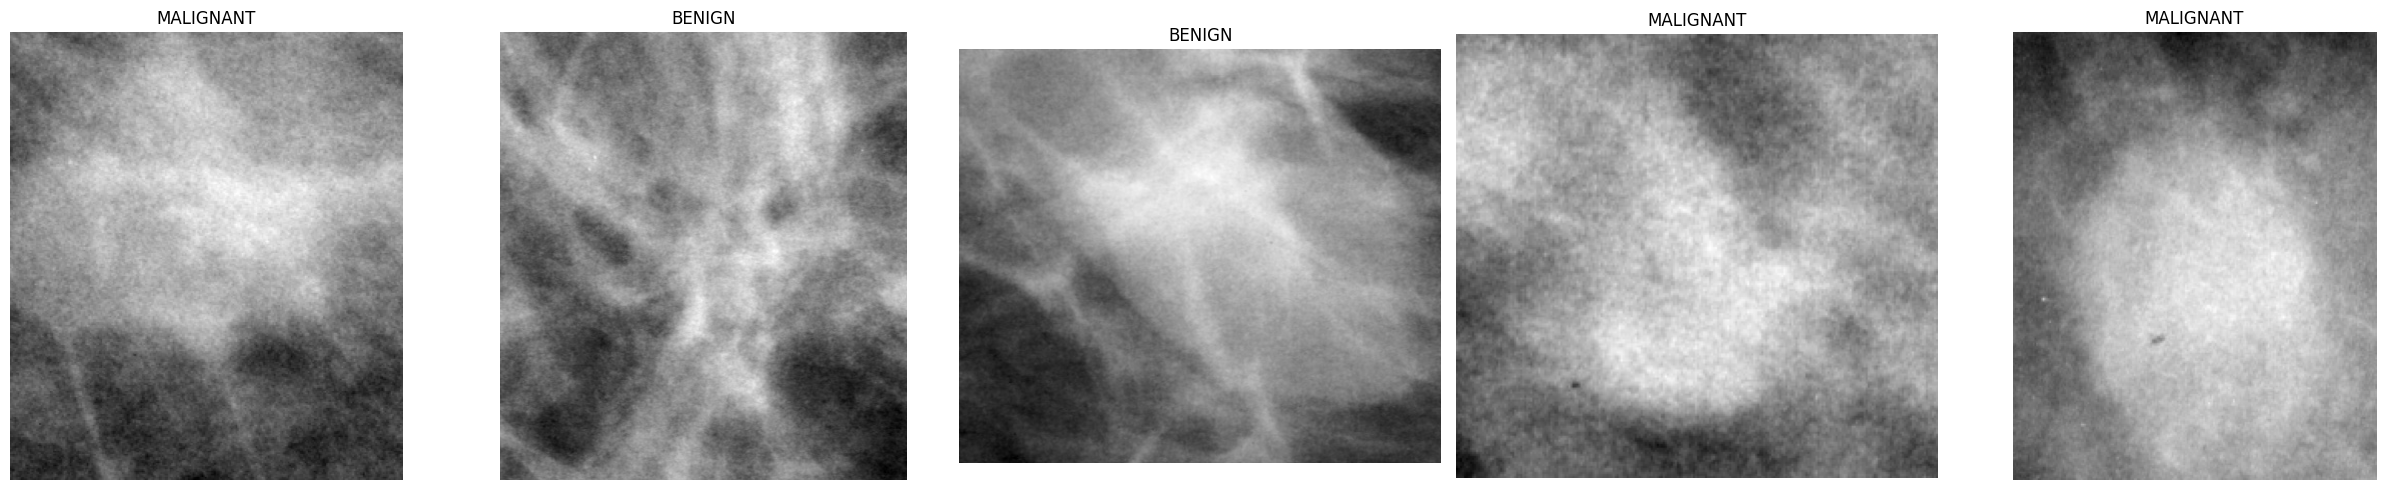

ROI Mask Mammograms:



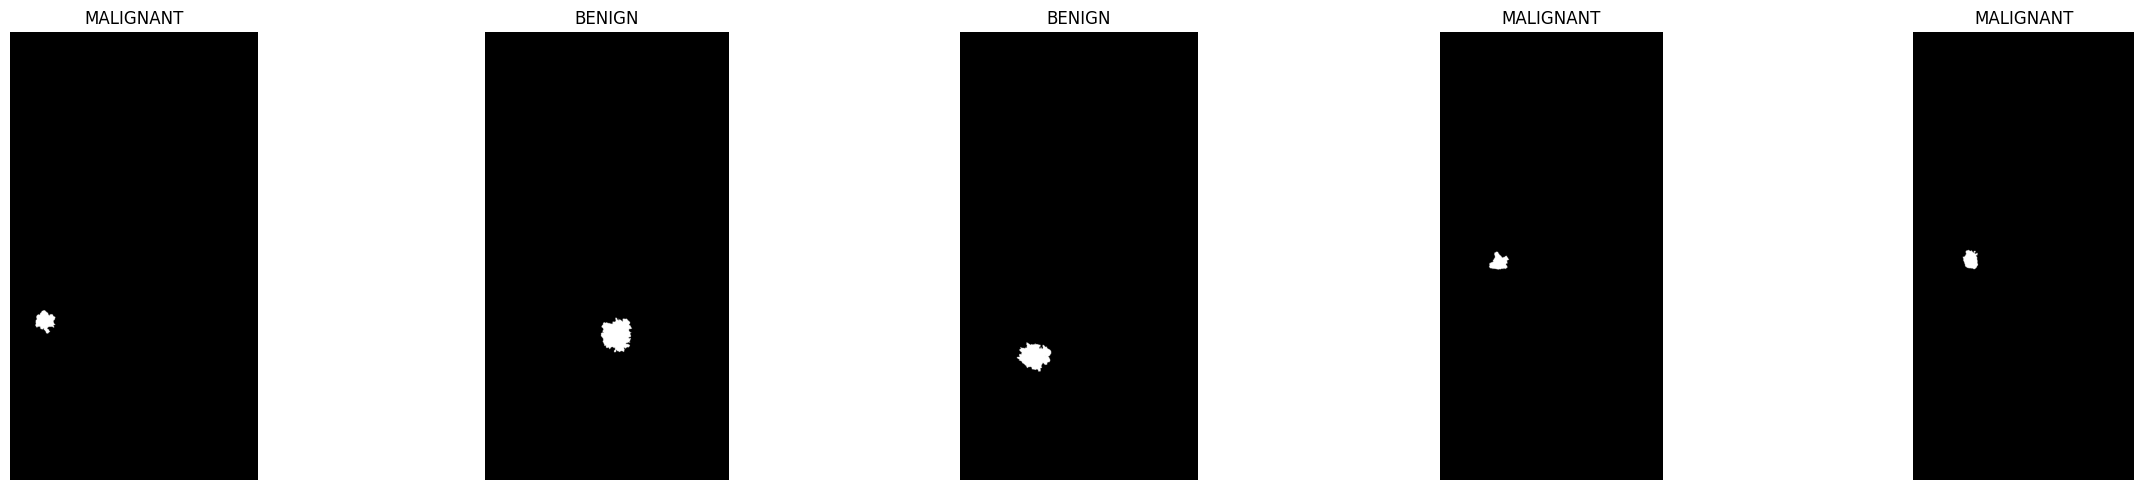

In [34]:
print('Full Mammograms:\n')
display_images('image_file_path', 5)

print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

print('ROI Mask Mammograms:\n')
display_images('ROI_mask_file_path', 5)


In [35]:
from tensorflow.keras.utils import to_categorical
# Import necessary TensorFlow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.applications.densenet import DenseNet169
import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import warnings

# Suppress all warnings globally
warnings.filterwarnings("ignore")


2025-05-14 15:36:51.845135: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 15:36:51.847145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 15:36:51.887253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 15:36:51.888016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-14 15:36:54.878915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Image preprocessing


In [36]:
#second preprocessing
def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    #image = cv2.imread(absolute_image_path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.imread(absolute_image_path, cv2.IMREAD_GRAYSCALE)

    # Skip unreadable or empty images
    if image is None:
        print(f"Skipping unreadable image: {absolute_image_path}")
        return None
    
    # Resize image
    image = cv2.resize(image, (target_size[1], target_size[0]))
    
    # Histogram Equalization
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    #l_channel, a_channel, b_channel = cv2.split(image)
    #clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    #l_channel = clahe.apply(l_channel)
    #image = cv2.merge((l_channel, a_channel, b_channel))
    #image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    
     #Negative transformation
    #image = 255 - image
    
     #Rescale to [0, 1]
    image = image.astype(np.float32) / 255.0
    
    return image

In [37]:
# Merge datasets
full_mass = pd.concat([mass_train_df, mass_test_df], axis=0)

In [65]:
# Define the target size
target_size = (256, 256, 1)
#target_size = (224, 224)

In [66]:
# Sample a subset of images
sample_size = 1696  # Adjust the sample size as needed
full_mass_sample = full_mass.sample(n=sample_size, random_state=42)

In [67]:
# Apply preprocessor to train data
full_mass_sample['processed_images'] = full_mass_sample['image_file_path'].apply(
    lambda x: image_processor(x, target_size)
)
full_mass_sample['mask_images'] = full_mass_sample['ROI_mask_file_path'].apply(
    lambda y: image_processor(y, target_size)
)


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175476572912204146233170994160170991797/1-227.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199195778912558713817031507321459770006/1-135.jpg


[ WARN:0@845.293] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175476572912204146233170994160170991797/1-227.jpg'): can't open/read file: check file path/integrity
[ WARN:0@845.437] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199195778912558713817031507321459770006/1-135.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336120486712406273923832111983569913869/1-113.jpg


[ WARN:0@845.548] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336120486712406273923832111983569913869/1-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.180869746613853192241744905213634425726/1-281.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.235220303613128401917357295780294851812/1-186.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258122848711932114229110145764023097059/1-085.jpg


[ WARN:0@845.850] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.180869746613853192241744905213634425726/1-281.jpg'): can't open/read file: check file path/integrity
[ WARN:0@845.967] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.235220303613128401917357295780294851812/1-186.jpg'): can't open/read file: check file path/integrity
[ WARN:0@846.032] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258122848711932114229110145764023097059/1-085.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174014585211651496903314748162396558249/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19175306412221051336720162903880247165/1-065.jpg


[ WARN:0@846.071] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174014585211651496903314748162396558249/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@846.071] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19175306412221051336720162903880247165/1-065.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.117454129112394095421646199292904617412/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16311307713420957612660499721513179515/1-262.jpg


[ WARN:0@846.337] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.117454129112394095421646199292904617412/1-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@846.493] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16311307713420957612660499721513179515/1-262.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128110220510263998502063254390605854196/1-054.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417738311511512636014376396132371802556/1-038.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.171166015912754582622813408142073790722/1-096.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334704328611391643805508991083300190349/1-108.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269090020912271881612869996851061481178/1-265.jpg


[ WARN:0@846.878] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128110220510263998502063254390605854196/1-054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@846.879] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417738311511512636014376396132371802556/1-038.jpg'): can't open/read file: check file path/integrity
[ WARN:0@847.006] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@847.006] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.171166015912754582622813408142073790722/1-096.jpg'): can't open/read file: check file path/integrity
[ WARN:0@847.006] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.397197585712576980835218625502162434719/1-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154058962613328519929136864181603772657/1-205.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17179439612364242913491828612897592599/1-075.jpg


[ WARN:0@847.336] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.397197585712576980835218625502162434719/1-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@847.485] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154058962613328519929136864181603772657/1-205.jpg'): can't open/read file: check file path/integrity
[ WARN:0@847.522] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17179439612364242913491828612897592599/1-075.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403824995113685855926042098451429311853/1-259.jpg


[ WARN:0@847.958] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403824995113685855926042098451429311853/1-259.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293359047911187270714650133994167840030/1-181.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263918199211476516622099513693475115311/1-190.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162585879813814097935228732511788537826/1-119.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.321571514713247316135159699532641256508/1-215.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83748848211897641311753926793600384304/1-117.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.388721083313285222217770141913502774487/1-233.jpg


[ WARN:0@848.200] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293359047911187270714650133994167840030/1-181.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.200] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263918199211476516622099513693475115311/1-190.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.229] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162585879813814097935228732511788537826/1-119.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.229] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.321571514713247316135159699532641256508/1-215.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.307] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242629471012127869529548965622673332057/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52911228912044066036741669740519618759/1-054.jpg


[ WARN:0@848.421] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242629471012127869529548965622673332057/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.421] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52911228912044066036741669740519618759/1-054.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.9383151312430789908711205212663448581/1-243.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158760583312396940802790127503023485498/1-099.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290229220113810647235081932003928413427/1-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280437157711493692000884645494047094463/1-130.jpg


[ WARN:0@848.622] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.9383151312430789908711205212663448581/1-243.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.804] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158760583312396940802790127503023485498/1-099.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.804] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290229220113810647235081932003928413427/1-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@848.804] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280437157711493692000884645494047094463/1-130.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283896293710468565409445671813981066945/1-033.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8345832613913482803966749762437997260/1-017.jpg


[ WARN:0@848.980] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283896293710468565409445671813981066945/1-033.jpg'): can't open/read file: check file path/integrity
[ WARN:0@849.143] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8345832613913482803966749762437997260/1-017.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232043140012455442340816109393409527243/1-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69102481911614345738992761764104656383/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57356823611525636036904521060745035167/1-236.jpg


[ WARN:0@849.807] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232043140012455442340816109393409527243/1-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@849.834] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69102481911614345738992761764104656383/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@849.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57356823611525636036904521060745035167/1-236.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.270615391512904438603136029871346997827/1-180.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304645495911706483111438481251619390979/1-117.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162995550512107573002420048841033718661/1-115.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70876162012018497914376684992676851191/1-181.jpg


[ WARN:0@850.199] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.270615391512904438603136029871346997827/1-180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@850.199] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304645495911706483111438481251619390979/1-117.jpg'): can't open/read file: check file path/integrity
[ WARN:0@850.355] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.162995550512107573002420048841033718661/1-115.jpg'): can't open/read file: check file path/integrity
[ WARN:0@850.355] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70876162012018497914376684992676851191/1-181.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74118182511203115438320774433815814204/1-054.jpg


[ WARN:0@850.412] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74118182511203115438320774433815814204/1-054.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149772059212195203914176201483014915047/1-158.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.234810835612633355538815031322259010855/1-061.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188171322412490158916861741203390183722/1-215.jpg


[ WARN:0@850.830] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149772059212195203914176201483014915047/1-158.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.020] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.234810835612633355538815031322259010855/1-061.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.020] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188171322412490158916861741203390183722/1-215.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8846141612920489319812758360158257270/1-050.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109231371313746091407897394002747255810/1-090.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.145489058813789765335170389942387615556/1-040.jpg


[ WARN:0@851.089] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.8846141612920489319812758360158257270/1-050.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.176] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109231371313746091407897394002747255810/1-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.230] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.145489058813789765335170389942387615556/1-040.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.78684859813284664039916578740172712994/1-069.jpg


[ WARN:0@851.400] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.78684859813284664039916578740172712994/1-069.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345140832810160378520078721331878282316/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417608135813097018923712441772099200133/1-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357895865312935232740791412752491722139/1-273.jpg


[ WARN:0@851.616] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345140832810160378520078721331878282316/1-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.680] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.417608135813097018923712441772099200133/1-167.jpg'): can't open/read file: check file path/integrity
[ WARN:0@851.716] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357895865312935232740791412752491722139/1-273.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69745952012889155812092274262822416242/1-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.303187804912710561742283155760426369730/1-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245550762511135550738178630953626561752/1-283.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113107599413757334715056198522480123157/1-223.jpg


[ WARN:0@851.996] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69745952012889155812092274262822416242/1-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.058] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.303187804912710561742283155760426369730/1-239.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.059] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245550762511135550738178630953626561752/1-283.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.190] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113107599413757334715056198522480123157/1-223.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172386840512013560230074211023706864061/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158164935212165043120376357330832910201/1-177.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371739864613089761719883355291307551226/1-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246326421513862106416389991742169179906/1-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.30946803412446097718909326270548961243/1-153.jpg


[ WARN:0@852.339] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172386840512013560230074211023706864061/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.339] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.158164935212165043120376357330832910201/1-177.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.433] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371739864613089761719883355291307551226/1-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.501] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246326421513862106416389991742169179906/1-107.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.502] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67409892012207587532711656111341914913/1-113.jpg


[ WARN:0@852.570] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67409892012207587532711656111341914913/1-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12669257310082858042663169390086466638/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216808559312941034119240923160831351862/1-272.jpg


[ WARN:0@852.800] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12669257310082858042663169390086466638/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@852.885] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216808559312941034119240923160831351862/1-272.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201240665512195560313953074353682854284/1-122.jpg


[ WARN:0@853.062] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201240665512195560313953074353682854284/1-122.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419780045811507010327582708564022857860/1-299.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.288980828511203708511066530843699446563/1-225.jpg


[ WARN:0@853.525] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419780045811507010327582708564022857860/1-299.jpg'): can't open/read file: check file path/integrity
[ WARN:0@853.525] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.288980828511203708511066530843699446563/1-225.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44065475811569696824006401280610368950/1-228.jpg


[ WARN:0@854.448] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44065475811569696824006401280610368950/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151746203711583824325790496232356555781/1-133.jpg


[ WARN:0@854.681] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151746203711583824325790496232356555781/1-133.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325293736011893421816901315930122472763/1-183.jpg


[ WARN:0@854.992] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325293736011893421816901315930122472763/1-183.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54848434312309044100463325442088001375/1-148.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33507760912554145902744111920344485171/1-235.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191684932212508771025952925500117559600/1-118.jpg


[ WARN:0@855.383] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54848434312309044100463325442088001375/1-148.jpg'): can't open/read file: check file path/integrity
[ WARN:0@855.424] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33507760912554145902744111920344485171/1-235.jpg'): can't open/read file: check file path/integrity
[ WARN:0@855.564] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191684932212508771025952925500117559600/1-118.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200394253511150032912987268422492919749/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149183380211624614428278537532778083640/1-178.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370020768811676220424047464123530592133/1-204.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416023076012080833905740875610727249164/1-196.jpg


[ WARN:0@855.620] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200394253511150032912987268422492919749/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@855.703] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149183380211624614428278537532778083640/1-178.jpg'): can't open/read file: check file path/integrity
[ WARN:0@855.703] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370020768811676220424047464123530592133/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@855.733] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416023076012080833905740875610727249164/1-196.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.395806490413060973910077403213561423281/1-097.jpg


[ WARN:0@855.997] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@856.166] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.395806490413060973910077403213561423281/1-097.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.208612233610863139028646317134220626037/1-021.jpg


[ WARN:0@856.377] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg'): can't open/read file: check file path/integrity
[ WARN:0@856.520] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.208612233610863139028646317134220626037/1-021.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg


[ WARN:0@856.595] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.125012772811929054738373917960770689523/1-273.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141690078312425196829711709851898133059/1-195.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.311879772413692509211401737020929176955/1-177.jpg


[ WARN:0@857.049] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.125012772811929054738373917960770689523/1-273.jpg'): can't open/read file: check file path/integrity
[ WARN:0@857.172] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141690078312425196829711709851898133059/1-195.jpg'): can't open/read file: check file path/integrity
[ WARN:0@857.172] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.311879772413692509211401737020929176955/1-177.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227359829311782247437660996313591134165/1-265.jpg


[ WARN:0@857.274] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@857.312] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227359829311782247437660996313591134165/1-265.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241213639112627717226706279733585932152/1-003.jpg


[ WARN:0@857.772] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241213639112627717226706279733585932152/1-003.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.272184723711385047630954095450427972031/1-184.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83882081811707961806397341681542038535/1-198.jpg


[ WARN:0@858.102] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@858.102] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.272184723711385047630954095450427972031/1-184.jpg'): can't open/read file: check file path/integrity
[ WARN:0@858.201] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83882081811707961806397341681542038535/1-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223355501110410477409262071651794035858/1-060.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.120465669611268291509420478952677521038/1-173.jpg


[ WARN:0@858.447] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223355501110410477409262071651794035858/1-060.jpg'): can't open/read file: check file path/integrity
[ WARN:0@858.579] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.120465669611268291509420478952677521038/1-173.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85686461910787171020983218554121150052/1-291.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046/1-075.jpg


[ WARN:0@859.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85686461910787171020983218554121150052/1-291.jpg'): can't open/read file: check file path/integrity
[ WARN:0@859.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175043772610570804328930190413021504082/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@859.203] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@859.204] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046/1-075.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg


[ WARN:0@859.307] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95066275112816836637397827910274893726/1-298.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55307148413799814332579214442886195340/1-298.jpg


[ WARN:0@859.544] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55307148413799814332579214442886195340/1-298.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219607249012903142628057639991148226306/1-072.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.36825032713107530300938213160028717974/1-270.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg


[ WARN:0@859.795] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219607249012903142628057639991148226306/1-072.jpg'): can't open/read file: check file path/integrity
[ WARN:0@859.796] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.36825032713107530300938213160028717974/1-270.jpg'): can't open/read file: check file path/integrity
[ WARN:0@859.915] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138854373111438727811729486684128233341/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.1147559510416701110684356293737205301/1-079.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59887648512379053809277845872128232362/1-106.jpg


[ WARN:0@860.149] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138854373111438727811729486684128233341/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@860.149] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.1147559510416701110684356293737205301/1-079.jpg'): can't open/read file: check file path/integrity
[ WARN:0@860.252] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59887648512379053809277845872128232362/1-106.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg


[ WARN:0@860.465] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194084118912652164632677195583265936023/1-190.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.176964796612485740037787572680731561117/1-077.jpg


[ WARN:0@860.681] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194084118912652164632677195583265936023/1-190.jpg'): can't open/read file: check file path/integrity
[ WARN:0@860.747] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.176964796612485740037787572680731561117/1-077.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349504173712862535704286567751526799904/1-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647/1-111.jpg


[ WARN:0@860.885] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349504173712862535704286567751526799904/1-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@860.913] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647/1-111.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172787227312499793236059621232382095130/1-267.jpg


[ WARN:0@861.483] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.172787227312499793236059621232382095130/1-267.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.313320260312335825215652094932408846389/1-089.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62593965512657640623373713153873390284/1-129.jpg


[ WARN:0@861.859] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.313320260312335825215652094932408846389/1-089.jpg'): can't open/read file: check file path/integrity
[ WARN:0@861.881] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg'): can't open/read file: check file path/integrity
[ WARN:0@862.031] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62593965512657640623373713153873390284/1-129.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28994390011193705314585586210966915731/1-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317213562911173877740615561593769151663/1-037.jpg


[ WARN:0@862.061] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28994390011193705314585586210966915731/1-163.jpg'): can't open/read file: check file path/integrity
[ WARN:0@862.259] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317213562911173877740615561593769151663/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361510015512526913136413449054168104152/1-230.jpg


[ WARN:0@862.543] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361510015512526913136413449054168104152/1-230.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56526196612878022942647118353975254976/1-017.jpg


[ WARN:0@862.830] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56526196612878022942647118353975254976/1-017.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382912580213452264934816946051837938528/1-036.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46228080811339703822182406561482041808/1-085.jpg


[ WARN:0@863.040] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382912580213452264934816946051837938528/1-036.jpg'): can't open/read file: check file path/integrity
[ WARN:0@863.113] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46228080811339703822182406561482041808/1-085.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27953444711693870518443009471767038842/1-179.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364070243511921550101340386794199125508/1-107.jpg


[ WARN:0@863.548] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27953444711693870518443009471767038842/1-179.jpg'): can't open/read file: check file path/integrity
[ WARN:0@863.717] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364070243511921550101340386794199125508/1-107.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.273104176312975794115853377520445198068/1-149.jpg


[ WARN:0@864.167] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity
[ WARN:0@864.168] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.273104176312975794115853377520445198068/1-149.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403835121912715843000196868400248684588/1-104.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139051271411881139019982240242711370769/1-061.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.4258120910410897428422437754132883711/1-109.jpg


[ WARN:0@864.409] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403835121912715843000196868400248684588/1-104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@864.410] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@864.528] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.95930514311143196521379851620797527375/1-133.jpg'): can't open/read file: check file path/integrity
[ WARN:0@864.576] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139051271411881139019982240242711370769/1-061.jpg'): can't open/read file: check file path/integrity
[ WARN:0@864.605] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281986553811315949820316643132362105669/1-198.jpg


[ WARN:0@864.667] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281986553811315949820316643132362105669/1-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385754322612458255422314848630057330699/1-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.374524690313732405614119264610057663073/1-035.jpg


[ WARN:0@865.138] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385754322612458255422314848630057330699/1-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@865.138] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.374524690313732405614119264610057663073/1-035.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.412557731711484790541710247932923951861/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.282187186212471477920122594912799518222/1-128.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg


[ WARN:0@865.565] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.412557731711484790541710247932923951861/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@865.603] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.282187186212471477920122594912799518222/1-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@865.627] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/1-012.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241488192410870375308842249503092939065/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.354974451012606666730836312563315842748/1-072.jpg


[ WARN:0@865.822] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.241488192410870375308842249503092939065/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@865.915] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.354974451012606666730836312563315842748/1-072.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119329332411807101909567041850958066649/1-242.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280715336413264839123954197972783877415/1-209.jpg


[ WARN:0@866.136] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119329332411807101909567041850958066649/1-242.jpg'): can't open/read file: check file path/integrity
[ WARN:0@866.137] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280715336413264839123954197972783877415/1-209.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351386294512687684821629395204182081789/1-138.jpg


[ WARN:0@866.672] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351386294512687684821629395204182081789/1-138.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424375028213529712235170387420953707530/1-257.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351095773812262405525829356842200610924/1-251.jpg


[ WARN:0@866.952] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424375028213529712235170387420953707530/1-257.jpg'): can't open/read file: check file path/integrity
[ WARN:0@867.145] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351095773812262405525829356842200610924/1-251.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10317846812362504718225532432231442871/1-233.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.92873692112697289717564934862862198857/1-279.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg


[ WARN:0@867.705] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10317846812362504718225532432231442871/1-233.jpg'): can't open/read file: check file path/integrity
[ WARN:0@867.762] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.92873692112697289717564934862862198857/1-279.jpg'): can't open/read file: check file path/integrity
[ WARN:0@867.819] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328977677511962475112321192060403830590/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69688454812257584638918432052709217066/1-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17873451612287715806233693563532897726/1-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88567571811865245834350703782525414557/1-188.jpg


[ WARN:0@867.946] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.69688454812257584638918432052709217066/1-003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@867.946] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17873451612287715806233693563532897726/1-111.jpg'): can't open/read file: check file path/integrity
[ WARN:0@868.058] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88567571811865245834350703782525414557/1-188.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136087942912627055207233775400589898698/1-106.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.212873695611515204908544382810356004572/1-077.jpg


[ WARN:0@868.230] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136087942912627055207233775400589898698/1-106.jpg'): can't open/read file: check file path/integrity
[ WARN:0@868.405] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.212873695611515204908544382810356004572/1-077.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.26328160312807915105944979513644204307/1-042.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413759996612745390518110068652608488468/1-258.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46561815111905129726185322260150997233/1-070.jpg


[ WARN:0@868.541] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.26328160312807915105944979513644204307/1-042.jpg'): can't open/read file: check file path/integrity
[ WARN:0@868.576] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413759996612745390518110068652608488468/1-258.jpg'): can't open/read file: check file path/integrity
[ WARN:0@868.610] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46561815111905129726185322260150997233/1-070.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298507260212876852534436916713961683073/1-072.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33525463311604309520509720512605682139/1-244.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90049668411003307234280101243836805116/1-156.jpg


[ WARN:0@868.963] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298507260212876852534436916713961683073/1-072.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.027] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33525463311604309520509720512605682139/1-244.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.028] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90049668411003307234280101243836805116/1-156.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181882185012532469840938456443196306608/1-100.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg


[ WARN:0@869.264] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181882185012532469840938456443196306608/1-100.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.330] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.463] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.399831242111800621220027542190666363688/1-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225312674712404832441253979110135741852/1-200.jpg


[ WARN:0@869.530] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.399831242111800621220027542190666363688/1-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.634] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225312674712404832441253979110135741852/1-200.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283057547411492757733739237421644364669/1-262.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129176419311733274935464126784195349376/1-029.jpg


[ WARN:0@869.771] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.283057547411492757733739237421644364669/1-262.jpg'): can't open/read file: check file path/integrity
[ WARN:0@869.870] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129176419311733274935464126784195349376/1-029.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52961829611670829303289191680479351305/1-245.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261521794613721978940690958173191292096/1-290.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51941006212124694604546402963586764653/1-012.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144135582511225260304642832923710501704/1-125.jpg


[ WARN:0@870.120] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52961829611670829303289191680479351305/1-245.jpg'): can't open/read file: check file path/integrity
[ WARN:0@870.145] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261521794613721978940690958173191292096/1-290.jpg'): can't open/read file: check file path/integrity
[ WARN:0@870.145] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51941006212124694604546402963586764653/1-012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@870.227] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144135582511225260304642832923710501704/1-125.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.211640311212194984322998849642182089069/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88886372611812195428352690450990697351/1-008.jpg


[ WARN:0@870.350] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.211640311212194984322998849642182089069/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@870.504] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88886372611812195428352690450990697351/1-008.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361011800613187938628920052961866947309/1-242.jpg


[ WARN:0@870.633] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.361011800613187938628920052961866947309/1-242.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368677889211938858542071548600720272101/1-296.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366557165612782681202292343440774546974/1-225.jpg


[ WARN:0@871.458] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368677889211938858542071548600720272101/1-296.jpg'): can't open/read file: check file path/integrity
[ WARN:0@871.614] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366557165612782681202292343440774546974/1-225.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.277904999011825388509729900852338577655/1-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47853905212613770720342330132409520084/1-111.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160090908610489507721266482061808282031/1-138.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57854390411125252714525874340062956276/1-102.jpg


[ WARN:0@871.707] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.277904999011825388509729900852338577655/1-135.jpg'): can't open/read file: check file path/integrity
[ WARN:0@871.734] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47853905212613770720342330132409520084/1-111.jpg'): can't open/read file: check file path/integrity
[ WARN:0@871.826] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160090908610489507721266482061808282031/1-138.jpg'): can't open/read file: check file path/integrity
[ WARN:0@871.871] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57854390411125252714525874340062956276/1-102.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44354553611120086116092433180902992105/1-142.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258560655311028193625111499672480670508/1-006.jpg


[ WARN:0@872.665] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44354553611120086116092433180902992105/1-142.jpg'): can't open/read file: check file path/integrity
[ WARN:0@872.763] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258560655311028193625111499672480670508/1-006.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19233593713150936611511674154223618351/1-027.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317216124410630220004117216344047489299/1-182.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.135126056112780974433437774491962300014/1-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425182509912779827704955040293854758529/1-022.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404577305912728645825627508702429716956/1-194.jpg


[ WARN:0@873.119] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19233593713150936611511674154223618351/1-027.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.201] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317216124410630220004117216344047489299/1-182.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.202] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.135126056112780974433437774491962300014/1-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.244] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425182509912779827704955040293854758529/1-022.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.244] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226496395312887740508078232422990396199/1-009.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317382923213614689928747109691347347957/1-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136495231711077347326245851332072991979/1-142.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200948278212842430531410154721256979027/1-169.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423418338111627617941958352860375625032/1-093.jpg


[ WARN:0@873.680] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226496395312887740508078232422990396199/1-009.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.680] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.317382923213614689928747109691347347957/1-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.680] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.136495231711077347326245851332072991979/1-142.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.681] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.200948278212842430531410154721256979027/1-169.jpg'): can't open/read file: check file path/integrity
[ WARN:0@873.768] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg


[ WARN:0@873.995] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94855395812079770126816595643794643222/1-041.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238090837412902571926841401701921392882/1-247.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144954714312199212434707587871456397264/1-127.jpg


[ WARN:0@874.205] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94855395812079770126816595643794643222/1-041.jpg'): can't open/read file: check file path/integrity
[ WARN:0@874.238] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238090837412902571926841401701921392882/1-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@874.294] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.144954714312199212434707587871456397264/1-127.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124069151812440873834583830380563934034/1-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260358200912160591136730728193628472216/1-238.jpg


[ WARN:0@874.446] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124069151812440873834583830380563934034/1-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@874.545] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260358200912160591136730728193628472216/1-238.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19265558812219808138485666643988286593/1-238.jpg


[ WARN:0@874.678] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19265558812219808138485666643988286593/1-238.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74088365112551230507136001593462769806/1-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46282940310410044707024149930022040952/1-142.jpg


[ WARN:0@874.922] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74088365112551230507136001593462769806/1-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.075] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.46282940310410044707024149930022040952/1-142.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403249842912482807608031953090899102748/1-081.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194014761511237421025886729180261985635/1-290.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65397885011427959107666095712572175020/1-297.jpg


[ WARN:0@875.160] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403249842912482807608031953090899102748/1-081.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.160] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194014761511237421025886729180261985635/1-290.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.209] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65397885011427959107666095712572175020/1-297.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268167584712827481520301103922935194568/1-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304847144212231865016298922630149685326/1-078.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg


[ WARN:0@875.425] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268167584712827481520301103922935194568/1-155.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.425] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304847144212231865016298922630149685326/1-078.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.472] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27655563411193153813026594573787372096/1-062.jpg


[ WARN:0@875.628] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27655563411193153813026594573787372096/1-062.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42743836211077677906084043904182953420/1-276.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228112769110310508212894048352876218391/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299665718312676631426589111303357883600/1-037.jpg


[ WARN:0@875.829] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42743836211077677906084043904182953420/1-276.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.886] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228112769110310508212894048352876218391/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@875.920] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299665718312676631426589111303357883600/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25032151411293752139034702442380199664/1-202.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265454151711796157924978185193155462733/1-241.jpg


[ WARN:0@876.054] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25032151411293752139034702442380199664/1-202.jpg'): can't open/read file: check file path/integrity
[ WARN:0@876.099] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.265454151711796157924978185193155462733/1-241.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.50489409611504312524210891883569393093/1-129.jpg


[ WARN:0@876.343] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.50489409611504312524210891883569393093/1-129.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.256330807412877366440153727190246662818/1-055.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392008643813084177039922070163021225657/1-079.jpg


[ WARN:0@876.845] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.256330807412877366440153727190246662818/1-055.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.018] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392008643813084177039922070163021225657/1-079.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398065969612214189500602623110797804795/1-154.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148157969912384261328015497391094806291/1-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.152233603112126251623360168063905498710/1-282.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362096355311749880109413095802268936069/1-263.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247139233113856247217565715372804656493/1-231.jpg


[ WARN:0@877.105] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398065969612214189500602623110797804795/1-154.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.106] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148157969912384261328015497391094806291/1-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.106] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.152233603112126251623360168063905498710/1-282.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.135] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362096355311749880109413095802268936069/1-263.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27980645513718577626150235351487309400/1-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359948563313211921203994090300862857070/1-196.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308645904112578662514088364913247733416/1-152.jpg


[ WARN:0@877.347] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27980645513718577626150235351487309400/1-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.392] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359948563313211921203994090300862857070/1-196.jpg'): can't open/read file: check file path/integrity
[ WARN:0@877.543] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308645904112578662514088364913247733416/1-152.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151178406511629586605682927950166107710/1-203.jpg


[ WARN:0@877.985] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.151178406511629586605682927950166107710/1-203.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149608967312503353909450618211677669934/1-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76958903112621704936459227274115747517/1-117.jpg


[ WARN:0@878.417] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.149608967312503353909450618211677669934/1-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@878.526] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76958903112621704936459227274115747517/1-117.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65603312513435703008593993544017526418/1-228.jpg


[ WARN:0@878.773] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.65603312513435703008593993544017526418/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.116404757511169555513192121640222765024/1-084.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189618700912186602728870178774202689346/1-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.262900378610637773719221008832166959346/1-120.jpg


[ WARN:0@878.977] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.116404757511169555513192121640222765024/1-084.jpg'): can't open/read file: check file path/integrity
[ WARN:0@879.012] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189618700912186602728870178774202689346/1-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@879.012] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@879.073] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.262900378610637773719221008832166959346/1-120.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104175843212955332137248400671186776872/1-262.jpg


[ WARN:0@879.479] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104175843212955332137248400671186776872/1-262.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345891015013816713918233478951770382675/1-140.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260826680211463150629506377090181207701/1-120.jpg


[ WARN:0@879.830] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345891015013816713918233478951770382675/1-140.jpg'): can't open/read file: check file path/integrity
[ WARN:0@879.935] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260826680211463150629506377090181207701/1-120.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421506712613822555700638363361805204735/1-039.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91499954013996703516414818583573199018/1-264.jpg


[ WARN:0@880.152] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421506712613822555700638363361805204735/1-039.jpg'): can't open/read file: check file path/integrity
[ WARN:0@880.152] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91499954013996703516414818583573199018/1-264.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27686561811725760701013428913326410240/1-147.jpg


[ WARN:0@880.648] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27686561811725760701013428913326410240/1-147.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413066189111289743521076284514105478750/1-197.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147836511311460633701654478620200219052/1-057.jpg


[ WARN:0@880.967] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.413066189111289743521076284514105478750/1-197.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.001] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147836511311460633701654478620200219052/1-057.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284762492511939117113096431964067150055/1-217.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63200910512557522821086711330263634348/1-016.jpg


[ WARN:0@881.392] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284762492511939117113096431964067150055/1-217.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.475] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63200910512557522821086711330263634348/1-016.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408841612911259188639006846810670253077/1-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255728555213663489012061953844243079023/1-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47970571410947468918537931823160772974/1-245.jpg


[ WARN:0@881.652] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408841612911259188639006846810670253077/1-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.652] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255728555213663489012061953844243079023/1-107.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.756] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47970571410947468918537931823160772974/1-245.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.879] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.20451842012947487407679988681863733854/1-234.jpg'): can't open/read file: check file path/integrity
[ WARN:0@881.879] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.20451842012947487407679988681863733854/1-234.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.227873690711676823827576319042588800296/1-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54057852711245745614684087582249091583/1-113.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55778548111209969424695307662410813691/1-016.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.159917220213401433113606588331484616686/1-154.jpg


[ WARN:0@882.083] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.55778548111209969424695307662410813691/1-016.jpg'): can't open/read file: check file path/integrity
[ WARN:0@882.200] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.159917220213401433113606588331484616686/1-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/1-104.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52106446513173201929277628250108419748/1-086.jpg


[ WARN:0@882.414] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/1-104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@882.603] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.52106446513173201929277628250108419748/1-086.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148897897112363547336820799050685302111/1-153.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401023586412655416321348819711950708264/1-068.jpg


[ WARN:0@882.880] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.148897897112363547336820799050685302111/1-153.jpg'): can't open/read file: check file path/integrity
[ WARN:0@882.954] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401023586412655416321348819711950708264/1-068.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194693289311221141704233109863353072257/1-194.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179458899812520629223660238622755428813/1-163.jpg


[ WARN:0@883.235] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194693289311221141704233109863353072257/1-194.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.236] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168142052011948789309937030612218988654/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.316] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179458899812520629223660238622755428813/1-163.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85914409911351710839139096720265170726/1-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.405770000712613552327460084591951406869/1-255.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108774078613788646228188307731057957441/1-204.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.229153389010770069434497957601415230725/1-099.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194578416513260370005941884310932343300/1-267.jpg


[ WARN:0@883.555] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.85914409911351710839139096720265170726/1-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.600] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.405770000712613552327460084591951406869/1-255.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.654] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108774078613788646228188307731057957441/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.673] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.229153389010770069434497957601415230725/1-099.jpg'): can't open/read file: check file path/integrity
[ WARN:0@883.693] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174306451512326600232528311571344224372/1-057.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328888964910420470437557917552593278246/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251872183712067758830824012051583087146/1-164.jpg


[ WARN:0@884.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174306451512326600232528311571344224372/1-057.jpg'): can't open/read file: check file path/integrity
[ WARN:0@884.124] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.328888964910420470437557917552593278246/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@884.219] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251872183712067758830824012051583087146/1-164.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.107751848713697696607707227450395136936/1-051.jpg


[ WARN:0@884.302] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.107751848713697696607707227450395136936/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.99652509111900105331025325421855924911/1-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359653834712357915523724051462222236076/1-181.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg


[ WARN:0@884.993] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.99652509111900105331025325421855924911/1-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@884.993] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.359653834712357915523724051462222236076/1-181.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.147] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122014842013197980401803659680241641105/1-058.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284507638613416758207872997261004998521/1-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82469470811582019730628947720344371460/1-286.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.326151466811725669429426336100792405365/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199040568111077523402855758172229500384/1-000.jpg


[ WARN:0@885.289] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.284507638613416758207872997261004998521/1-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.375] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82469470811582019730628947720344371460/1-286.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.446] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.326151466811725669429426336100792405365/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.480] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199040568111077523402855758172229500384/1-000.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70012532911736490135306300510795887564/1-204.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.373282707011960449216083283203138529156/1-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57409664311439109642852588912629488901/1-144.jpg


[ WARN:0@885.669] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.70012532911736490135306300510795887564/1-204.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.731] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.373282707011960449216083283203138529156/1-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@885.782] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.57409664311439109642852588912629488901/1-144.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353764633213863442442494539840710764601/1-092.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403050124711420404835698594840910402827/1-254.jpg


[ WARN:0@886.013] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353764633213863442442494539840710764601/1-092.jpg'): can't open/read file: check file path/integrity
[ WARN:0@886.208] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@886.208] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403050124711420404835698594840910402827/1-254.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385132842112234370219192252632712589242/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166340572313787163317606045813812419177/1-075.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385006824412335838937657967684130607502/1-139.jpg


[ WARN:0@886.743] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385132842112234370219192252632712589242/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@886.840] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166340572313787163317606045813812419177/1-075.jpg'): can't open/read file: check file path/integrity
[ WARN:0@886.840] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385006824412335838937657967684130607502/1-139.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53164963713539945704420389270899642316/1-128.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg


[ WARN:0@887.089] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53164963713539945704420389270899642316/1-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@887.252] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.220564602411627135838034738500414889195/1-044.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6277281410639072436330631001055971673/1-191.jpg


[ WARN:0@887.342] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6277281410639072436330631001055971673/1-191.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218620318613956716810749252141856797976/1-299.jpg


[ WARN:0@887.544] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218620318613956716810749252141856797976/1-299.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91058729212200153403438754930629868603/1-273.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425698079412077502741643782591283336956/1-267.jpg


[ WARN:0@887.841] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.91058729212200153403438754930629868603/1-273.jpg'): can't open/read file: check file path/integrity
[ WARN:0@887.841] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.425698079412077502741643782591283336956/1-267.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113520701010845494417306400603477997325/1-227.jpg


[ WARN:0@888.268] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113520701010845494417306400603477997325/1-227.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223200299211434089119224646431205382397/1-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269371263412811256614469730851947013418/1-296.jpg


[ WARN:0@888.497] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.223200299211434089119224646431205382397/1-219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@888.627] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.269371263412811256614469730851947013418/1-296.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862/1-115.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306024108010728918506901922744233626490/1-188.jpg


[ WARN:0@888.726] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862/1-115.jpg'): can't open/read file: check file path/integrity
[ WARN:0@888.823] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306024108010728918506901922744233626490/1-188.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362620324812321450233913983280182210137/1-281.jpg


[ WARN:0@888.934] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362620324812321450233913983280182210137/1-281.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392766189012464402104913399043411120417/1-251.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113442706011768824426077733690823693046/1-269.jpg


[ WARN:0@889.307] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.392766189012464402104913399043411120417/1-251.jpg'): can't open/read file: check file path/integrity
[ WARN:0@889.361] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113442706011768824426077733690823693046/1-269.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12070919312880382900449340673073871236/1-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343599979312034701930436051711071015260/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362374565310914921540682385160998166344/1-112.jpg


[ WARN:0@889.616] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12070919312880382900449340673073871236/1-210.jpg'): can't open/read file: check file path/integrity
[ WARN:0@889.699] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343599979312034701930436051711071015260/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@889.699] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.362374565310914921540682385160998166344/1-112.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113794857611310734222099938972653890313/1-230.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292360889211001391813520710751199015294/1-051.jpg


[ WARN:0@889.967] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.113794857611310734222099938972653890313/1-230.jpg'): can't open/read file: check file path/integrity
[ WARN:0@889.997] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.292360889211001391813520710751199015294/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251130205811673047141172596702804417464/1-094.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.266133570313100849523783768411170795888/1-228.jpg


[ WARN:0@890.227] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251130205811673047141172596702804417464/1-094.jpg'): can't open/read file: check file path/integrity
[ WARN:0@890.342] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.266133570313100849523783768411170795888/1-228.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336294562711133796734275132653265929945/1-052.jpg


[ WARN:0@890.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336294562711133796734275132653265929945/1-052.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189675058012591271842516184791920684602/1-051.jpg


[ WARN:0@890.778] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189675058012591271842516184791920684602/1-051.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.323873351911762283127423474124042969679/1-252.jpg


[ WARN:0@891.005] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.323873351911762283127423474124042969679/1-252.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.123968816011512951434814084172747879091/1-289.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166407449713489341006907780000949344586/1-164.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6326146212137720929099055383856573953/1-154.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104119411412935707132033373840932496396/1-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255781430912151131328345834864129594300/1-067.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155550497511364708026317123900311555763/1-122.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146297207812381871014727591804106869851/1-137.jpg


[ WARN:0@891.260] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.123968816011512951434814084172747879091/1-289.jpg'): can't open/read file: check file path/integrity
[ WARN:0@891.308] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166407449713489341006907780000949344586/1-164.jpg'): can't open/read file: check file path/integrity
[ WARN:0@891.334] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.6326146212137720929099055383856573953/1-154.jpg'): can't open/read file: check file path/integrity
[ WARN:0@891.417] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104119411412935707132033373840932496396/1-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@891.417] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.355464339112205472025411629030840677852/1-195.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19398374813678635437774124921258413367/1-081.jpg


[ WARN:0@891.692] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.355464339112205472025411629030840677852/1-195.jpg'): can't open/read file: check file path/integrity
[ WARN:0@891.692] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.19398374813678635437774124921258413367/1-081.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322667976213415973414521161391249353390/1-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.134769761712283351009294739412953750298/1-193.jpg


[ WARN:0@891.926] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322667976213415973414521161391249353390/1-155.jpg'): can't open/read file: check file path/integrity
[ WARN:0@892.029] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.134769761712283351009294739412953750298/1-193.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394636780211288993834413664462575701980/1-080.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.182021535212924472406957876541192691518/1-173.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264906955811106358522569461023509978726/1-232.jpg


[ WARN:0@892.131] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.394636780211288993834413664462575701980/1-080.jpg'): can't open/read file: check file path/integrity
[ WARN:0@892.253] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.182021535212924472406957876541192691518/1-173.jpg'): can't open/read file: check file path/integrity
[ WARN:0@892.254] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264906955811106358522569461023509978726/1-232.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.170988990012713841817997341910281230031/1-186.jpg


[ WARN:0@892.471] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.385542139512279828113137552801440217253/1-091.jpg'): can't open/read file: check file path/integrity
[ WARN:0@892.564] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.170988990012713841817997341910281230031/1-186.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419552524112122749501984836111617727698/1-294.jpg


[ WARN:0@892.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419552524112122749501984836111617727698/1-294.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100682860911308271813943300011840547108/1-198.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54589971912845806600662511713175024068/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398258976712483192035853720641860573126/1-154.jpg


[ WARN:0@893.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.100682860911308271813943300011840547108/1-198.jpg'): can't open/read file: check file path/integrity
[ WARN:0@893.435] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.54589971912845806600662511713175024068/1-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@893.435] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398258976712483192035853720641860573126/1-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12869627612231993827821925170759563675/1-196.jpg


[ WARN:0@893.688] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.12869627612231993827821925170759563675/1-196.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16010789511745132713883529233369038329/1-112.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg


[ WARN:0@894.053] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18321540012684193708096260002352282494/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.079] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16010789511745132713883529233369038329/1-112.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.154] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419410657312812960613390693250292392446/1-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.110502161611149520011463704441518604678/1-058.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35590170712015951402001860292316082102/1-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325678795912867694418543446014194692233/1-128.jpg


[ WARN:0@894.331] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.110502161611149520011463704441518604678/1-058.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.482] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35590170712015951402001860292316082102/1-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.496] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325678795912867694418543446014194692233/1-128.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28518803912310395837837364480987494239/1-000.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82483264013703353211043055802582138051/1-180.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.29318932712695951431444118093650037083/2-032.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336071559511064328718791448490558949969/2-041.jpg


[ WARN:0@894.827] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.28518803912310395837837364480987494239/1-000.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.827] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82483264013703353211043055802582138051/1-180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.827] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.29318932712695951431444118093650037083/2-032.jpg'): can't open/read file: check file path/integrity
[ WARN:0@894.880] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.336071559511064328718791448490558949969/2-041.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.312683164812188449337131936611168112246/1-108.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.190371998012909216226366286144226107826/2-165.jpg


[ WARN:0@895.094] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.312683164812188449337131936611168112246/1-108.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.262] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.190371998012909216226366286144226107826/2-165.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18695903710455254723742342582229221687/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109452252012424458222829590173400022787/2-081.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56409915911497420438183697022964604975/1-250.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237226740511457824723686921453765620907/1-253.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243787511811578838018442497410147237753/2-040.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.187667275212026947717046191624230680968/1-270.jpg


[ WARN:0@895.364] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.18695903710455254723742342582229221687/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.364] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.109452252012424458222829590173400022787/2-081.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.499] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.56409915911497420438183697022964604975/1-250.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.524] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237226740511457824723686921453765620907/1-253.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.524] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371813759313271994601228594001917046161/1-065.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.389273289611161275802317999421109002390/2-132.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214710479912729172342312170422785489241/2-078.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255470422012641957411262465611415885514/1-076.jpg


[ WARN:0@895.567] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.371813759313271994601228594001917046161/1-065.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.670] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.389273289611161275802317999421109002390/2-132.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.763] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214710479912729172342312170422785489241/2-078.jpg'): can't open/read file: check file path/integrity
[ WARN:0@895.763] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255470422012641957411262465611415885514/1-076.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.275099505413660906340937714374028999095/2-113.jpg


[ WARN:0@895.866] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.275099505413660906340937714374028999095/2-113.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160240600513539121821203198981527996806/2-290.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.239086271612143569436272249690880577883/1-161.jpg


[ WARN:0@896.099] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.160240600513539121821203198981527996806/2-290.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.238] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.239086271612143569436272249690880577883/1-161.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202283445911304389526306403130030487752/2-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.324309622011475628318154737932701357211/1-159.jpg


[ WARN:0@896.408] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202283445911304389526306403130030487752/2-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.588] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.324309622011475628318154737932701357211/1-159.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/2-123.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247934203213872381418141618123923023703/2-153.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260137771311627538138583279643323289485/2-004.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245093344812536344341063041422079983468/2-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281340146110857934414592536624150012224/2-056.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426774094013742053816957912770661857707/1-214.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294502521311914830642172663623958151512/2-111.jpg


[ WARN:0@896.610] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/2-123.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.610] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247934203213872381418141618123923023703/2-153.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.641] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260137771311627538138583279643323289485/2-004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.656] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.245093344812536344341063041422079983468/2-157.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.701] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42400754213228696808259017561818845713/1-254.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141587019911453128902709907821893946336/2-121.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291570481913498840921190273752745496022/1-083.jpg


[ WARN:0@896.840] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.42400754213228696808259017561818845713/1-254.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.924] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141587019911453128902709907821893946336/2-121.jpg'): can't open/read file: check file path/integrity
[ WARN:0@896.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291570481913498840921190273752745496022/1-083.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252002833411214662214987930900134701246/2-110.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195128105212967051304365067870504250028/2-175.jpg


[ WARN:0@897.056] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252002833411214662214987930900134701246/2-110.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.187] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195128105212967051304365067870504250028/2-175.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121844987912199968113589579754023493214/1-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280587160611933401703009084553597862056/2-274.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383228819411157218228373387692252277708/1-038.jpg


[ WARN:0@897.315] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121844987912199968113589579754023493214/1-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.315] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280587160611933401703009084553597862056/2-274.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.364] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383228819411157218228373387692252277708/1-038.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419101916011003267204546254263412360938/2-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337889068912217823622466563932018789324/1-298.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260459930212973473121544705422367625902/2-255.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343083435212496268517777179012002399753/1-145.jpg


[ WARN:0@897.560] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.419101916011003267204546254263412360938/2-003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.560] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337889068912217823622466563932018789324/1-298.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.582] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.260459930212973473121544705422367625902/2-255.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.697] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.343083435212496268517777179012002399753/1-145.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331537760513637157804168239871022697740/2-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174146773011133252601051421943393040183/2-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299416691811132387805047574290099100208/2-070.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293544472312044196938017678411207859515/2-006.jpg


[ WARN:0@897.818] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331537760513637157804168239871022697740/2-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.875] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174146773011133252601051421943393040183/2-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.876] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299416691811132387805047574290099100208/2-070.jpg'): can't open/read file: check file path/integrity
[ WARN:0@897.944] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293544472312044196938017678411207859515/2-006.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108511516613015548417445804904165634208/1-278.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22011950713133475930291969510689163306/2-026.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199482819411130337534304815492391029165/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368399442311638014605380471312770309960/2-086.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304402775711897537235123344790702793618/2-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308306388611801688834091539392375023174/1-149.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314636098012486843933844430364271144365/1-142.jpg
Skipping unreadable image: /scratch/xxsi32

[ WARN:0@898.047] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.108511516613015548417445804904165634208/1-278.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.047] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22011950713133475930291969510689163306/2-026.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.047] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.199482819411130337534304815492391029165/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.136] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368399442311638014605380471312770309960/2-086.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.163] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88091748413596024615343003341621545741/1-247.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90509059711545836109239433043334788481/1-126.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.356736051912504701111877477291844813740/2-183.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82600937212058721501125633822189963843/1-013.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.354393322011557367835928690122016618367/1-060.jpg


[ WARN:0@898.264] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.88091748413596024615343003341621545741/1-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.338] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90509059711545836109239433043334788481/1-126.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.412] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.356736051912504701111877477291844813740/2-183.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.413] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.82600937212058721501125633822189963843/1-013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.426] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.184670114611965959303686276434269828677/2-181.jpg


[ WARN:0@898.475] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.184670114611965959303686276434269828677/2-181.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252709765911313151607841657963087943771/1-027.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309298420011968951324703077181333700449/1-004.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407994987213146477526717676850464563074/2-090.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39194036011823625811572909260453372676/2-221.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.61134486413720104741240478022432089415/2-296.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77795177210720655324735986231176035759/1-174.jpg


[ WARN:0@898.688] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252709765911313151607841657963087943771/1-027.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.714] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309298420011968951324703077181333700449/1-004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.751] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407994987213146477526717676850464563074/2-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.764] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39194036011823625811572909260453372676/2-221.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.801] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39603669310727873713809627273528862680/1-283.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/1-105.jpg


[ WARN:0@898.928] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.39603669310727873713809627273528862680/1-283.jpg'): can't open/read file: check file path/integrity
[ WARN:0@898.983] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/1-105.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402667733712709070330721404262541986194/1-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.98869608012141056833257796120597025392/2-090.jpg


[ WARN:0@899.132] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402667733712709070330721404262541986194/1-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.222] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.98869608012141056833257796120597025392/2-090.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422957282012810013841418684460061208674/2-130.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.73659499810499553515093536053563289213/2-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299479312912648479419761596652152845359/2-203.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126693328711730132832126278452304581219/2-162.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318639281112853501739829339283535805827/1-157.jpg


[ WARN:0@899.361] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422957282012810013841418684460061208674/2-130.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.362] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.73659499810499553515093536053563289213/2-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.394] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.299479312912648479419761596652152845359/2-203.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.425] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126693328711730132832126278452304581219/2-162.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.503] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138993602812076439220217343090472523549/2-020.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.360644371912187673603409637413721677692/1-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232381660012554908337053795134147800079/1-147.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/2-211.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217294520813663622129173556871595465656/2-232.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.167727012713850085819108783401526167252/2-274.jpg


[ WARN:0@899.569] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138993602812076439220217343090472523549/2-020.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.600] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.360644371912187673603409637413721677692/1-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.628] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.232381660012554908337053795134147800079/1-147.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.643] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/2-211.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.700] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.341068420311671969622955514164074452133/1-130.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382161872912744789714360820701966974210/1-151.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.278120339712544174710677784370473996861/2-001.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248913725011912288240186162162638948281/2-222.jpg


[ WARN:0@899.775] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.341068420311671969622955514164074452133/1-130.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.829] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.382161872912744789714360820701966974210/1-151.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.931] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.278120339712544174710677784370473996861/2-001.jpg'): can't open/read file: check file path/integrity
[ WARN:0@899.949] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.248913725011912288240186162162638948281/2-222.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569811858384728613382742918690380/2-124.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181257396413855177417874886622490293451/1-223.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22326887011227963702159533191468776297/2-082.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/1-068.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.310417008311970894938815230770265106023/1-271.jpg


[ WARN:0@900.004] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569811858384728613382742918690380/2-124.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.028] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181257396413855177417874886622490293451/1-223.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.029] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22326887011227963702159533191468776297/2-082.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.073] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/1-068.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.151] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126781186913766854307439581580291836768/2-141.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370932447012682741839171063160938015619/2-116.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53542233411818606701776508291995689378/2-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93494546611194317304163767440525328501/1-003.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398519079512363168827806972161822892706/1-289.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.129594164412130614306422222392803220137/1-271.jpg


[ WARN:0@900.256] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.126781186913766854307439581580291836768/2-141.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.256] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.370932447012682741839171063160938015619/2-116.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.293] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.53542233411818606701776508291995689378/2-239.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.338] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93494546611194317304163767440525328501/1-003.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.400] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.215883384511109118824190798611322360452/1-159.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83278964612407383507170994380094259682/1-280.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219721745011726028715811032511378262407/2-075.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93160717713188252726652597010470553673/1-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155455375812599409932240370254035865236/2-224.jpg


[ WARN:0@900.490] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.215883384511109118824190798611322360452/1-159.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.516] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.83278964612407383507170994380094259682/1-280.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.544] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.219721745011726028715811032511378262407/2-075.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.649] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93160717713188252726652597010470553673/1-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.663] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201522562711496443720752570002776479535/1-110.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296502375111567603140815409972383605349/2-144.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294923555711603100631051344774030253459/2-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251350240512056831321815843001686984239/1-152.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.203399722911412312801720083332539942756/1-010.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.286602072512553990503011301432450308323/2-101.jpg


[ WARN:0@900.715] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.201522562711496443720752570002776479535/1-110.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.716] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296502375111567603140815409972383605349/2-144.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.788] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.294923555711603100631051344774030253459/2-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.802] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.251350240512056831321815843001686984239/1-152.jpg'): can't open/read file: check file path/integrity
[ WARN:0@900.816] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.396436984912888479002383720172714065434/2-105.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/2-246.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337372969413997493515788537824040419536/2-068.jpg


[ WARN:0@900.983] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.009] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.396436984912888479002383720172714065434/2-105.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.070] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/2-246.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.172] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.337372969413997493515788537824040419536/2-068.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.320693689810782044906578213673576310905/2-151.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93044142711470198221610924971131123885/2-276.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/2-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226158167112340098106506899322612442723/2-207.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111234686411972432106619516282806676862/1-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.43508677612812439338333989233310798183/2-268.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59331645212722964919598145441897056623/1-103.jpg


[ WARN:0@901.203] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.320693689810782044906578213673576310905/2-151.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.262] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93044142711470198221610924971131123885/2-276.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.262] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/2-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.262] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.226158167112340098106506899322612442723/2-207.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.331] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/2-144.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401214379512684833222439968160756943149/1-104.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264380412611793072831152216401936916723/2-237.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25068466813068804538179331880251594913/2-089.jpg


[ WARN:0@901.430] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/2-144.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.467] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.401214379512684833222439968160756943149/1-104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.602] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264380412611793072831152216401936916723/2-237.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.603] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.25068466813068804538179331880251594913/2-089.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.340884794411477928114682894642675747391/2-269.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.75920974811241988723222022511903138247/2-160.jpg


[ WARN:0@901.636] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.340884794411477928114682894642675747391/2-269.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.753] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.75920974811241988723222022511903138247/2-160.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403411011112474923820858113371941158725/2-158.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63717644713809986732781249430042425901/2-213.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.137898033612101518602840511311691134958/1-160.jpg


[ WARN:0@901.896] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.403411011112474923820858113371941158725/2-158.jpg'): can't open/read file: check file path/integrity
[ WARN:0@901.928] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63717644713809986732781249430042425901/2-213.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.028] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.137898033612101518602840511311691134958/1-160.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404051289712034032002348776033776256148/2-282.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77701178612385361115971076201770600132/2-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334674409212634148512082105802285327690/2-237.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345272310611212109513584997603121811208/1-108.jpg


[ WARN:0@902.254] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404051289712034032002348776033776256148/2-282.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.281] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77701178612385361115971076201770600132/2-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334674409212634148512082105802285327690/2-237.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.377] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345272310611212109513584997603121811208/1-108.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422142794011896226117236778301735214520/1-299.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366476594211196854917146694673979411915/1-259.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.271414424911670964506067728680989711189/1-226.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319931480113384883734462189234286368429/1-198.jpg


[ WARN:0@902.505] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.422142794011896226117236778301735214520/1-299.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.621] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.366476594211196854917146694673979411915/1-259.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.653] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.271414424911670964506067728680989711189/1-226.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.702] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319931480113384883734462189234286368429/1-198.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322805592311399971221542217553849288689/2-057.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319602433610930800717919947950611154184/1-284.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192839938912396070517011019942189113216/1-192.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128089663710969494811189846281594474752/1-201.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.7394325412419055524300338092172956526/2-194.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64244239512457367223420936982089637275/2-119.jpg


[ WARN:0@902.837] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.322805592311399971221542217553849288689/2-057.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.838] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319602433610930800717919947950611154184/1-284.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.858] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192839938912396070517011019942189113216/1-192.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.896] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.128089663710969494811189846281594474752/1-201.jpg'): can't open/read file: check file path/integrity
[ WARN:0@902.927] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325966417613742936321163555014008553282/1-137.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10176378812103776813956712091127259677/1-208.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22617306611307586519548814632713216941/2-128.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/2-005.jpg


[ WARN:0@903.086] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325966417613742936321163555014008553282/1-137.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.104] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.10176378812103776813956712091127259677/1-208.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.178] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22617306611307586519548814632713216941/2-128.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.281] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/2-005.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.66283823511111041834706461471467721063/2-261.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216768457511513087938825660722752474923/1-102.jpg


[ WARN:0@903.322] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.66283823511111041834706461471467721063/2-261.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.484] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.216768457511513087938825660722752474923/1-102.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402680578311045896118493981762442088446/1-195.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg


[ WARN:0@903.560] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.402680578311045896118493981762442088446/1-195.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.696] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.329494580813585681530437157361075928685/1-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.89682018712520724125847313120036091153/1-090.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121833144911181799208999978460583290304/2-062.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274818125012496219521576367720748847527/2-210.jpg


[ WARN:0@903.971] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.329494580813585681530437157361075928685/1-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@903.986] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.89682018712520724125847313120036091153/1-090.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.086] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.121833144911181799208999978460583290304/2-062.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.103] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274818125012496219521576367720748847527/2-210.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.257313112412279783116569543002616396160/1-287.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214246281012674606311879883570054309779/1-059.jpg


[ WARN:0@904.179] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.257313112412279783116569543002616396160/1-287.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.377] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.214246281012674606311879883570054309779/1-059.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179492302212251367920634197780655644337/2-087.jpg


[ WARN:0@904.389] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.179492302212251367920634197780655644337/2-087.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138017235311810388121972829450834621660/1-217.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351651574212215901908071085391524934989/2-200.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.384199099313163908141123265622992905145/2-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.133462910711791086431220023163537511246/1-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.74426009913010551139890152232809554081/1-030.jpg


[ WARN:0@904.653] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.138017235311810388121972829450834621660/1-217.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.726] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351651574212215901908071085391524934989/2-200.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.726] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.384199099313163908141123265622992905145/2-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.765] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.133462910711791086431220023163537511246/1-083.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.816] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383285919712986381706460438071667571219/1-211.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.185464445813285754107126826551654410524/2-198.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334693589113039749800224016960397720534/2-024.jpg


[ WARN:0@904.858] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.383285919712986381706460438071667571219/1-211.jpg'): can't open/read file: check file path/integrity
[ WARN:0@904.926] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.185464445813285754107126826551654410524/2-198.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.058] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334693589113039749800224016960397720534/2-024.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35213499610180117017197818161597828685/2-097.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225307445711972492021703541080800178003/2-149.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.40980571712321743700864892560447902301/1-118.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.209605321012748626627455520162879888688/2-263.jpg


[ WARN:0@905.059] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.35213499610180117017197818161597828685/2-097.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.085] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.225307445711972492021703541080800178003/2-149.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.213] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.40980571712321743700864892560447902301/1-118.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.238] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.209605321012748626627455520162879888688/2-263.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166647978113123015306351415231157074233/2-126.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416546623612490134725052509540583814057/2-279.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.415590290711377309101867941373566266357/1-286.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146178524611063729406388066920149651114/2-233.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.27148298711187888502320098633296300043/2-236.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.2800998311573902408253367262894163632/2-298.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.288153362111736388134863963471171051300/1-071.jpg
Skipping unreadable image: /scratch/xxsi3290

[ WARN:0@905.282] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166647978113123015306351415231157074233/2-126.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.295] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.416546623612490134725052509540583814057/2-279.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.415590290711377309101867941373566266357/1-286.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.146178524611063729406388066920149651114/2-233.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.296] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238216059611621256525631758193558342949/2-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17425090212965511925096528813919881615/1-050.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/2-102.jpg


[ WARN:0@905.582] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.238216059611621256525631758193558342949/2-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.595] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.17425090212965511925096528813919881615/1-050.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.760] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/2-102.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174096203113029430042211306241029284553/1-093.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.348849211010660844509631430942686825269/2-197.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155124955712901305830310570753262439421/2-069.jpg


[ WARN:0@905.816] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.174096203113029430042211306241029284553/1-093.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.816] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.348849211010660844509631430942686825269/2-197.jpg'): can't open/read file: check file path/integrity
[ WARN:0@905.877] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155124955712901305830310570753262439421/2-069.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.198091631112816673639510202044031630921/2-238.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252513606010798015021300537904205297935/2-221.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261623737711979225101628945182576635559/2-019.jpg


[ WARN:0@906.104] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.198091631112816673639510202044031630921/2-238.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.242] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252513606010798015021300537904205297935/2-221.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.265] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.261623737711979225101628945182576635559/2-019.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.45333568212207677414965738353738652576/1-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.376929330412322183806810241454263344749/1-118.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.267426465012464916927857299474277539026/1-181.jpg


[ WARN:0@906.331] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.45333568212207677414965738353738652576/1-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.345] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.376929330412322183806810241454263344749/1-118.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.478] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.267426465012464916927857299474277539026/1-181.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351272204912461401915277016870066028936/2-145.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247686453312806717421635544732731976519/2-119.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192203895213138417701427117393744372264/2-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.379707289610326757632542844341667442069/2-173.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.194049371012376262322141457090192676444/1-083.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308902845611397599619640209013384074773/1-190.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.364927700011315459741075498511673465715/2-093.jpg


[ WARN:0@906.562] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.351272204912461401915277016870066028936/2-145.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.574] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.247686453312806717421635544732731976519/2-119.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.603] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.192203895213138417701427117393744372264/2-167.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.604] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.379707289610326757632542844341667442069/2-173.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.637] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.342806866711097390303497745003367823178/1-240.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298395396913193633428106412961761545595/2-122.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166811186713026003422384920873357262329/2-276.jpg


[ WARN:0@906.765] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.342806866711097390303497745003367823178/1-240.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.935] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.936] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.298395396913193633428106412961761545595/2-122.jpg'): can't open/read file: check file path/integrity
[ WARN:0@906.949] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.166811186713026003422384920873357262329/2-276.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202737793212722198626229134660237360289/2-175.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59598641912641828812603964202831725195/1-172.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189493149211959093109113826570512283652/2-148.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.71333513012885558329531613884249028215/1-109.jpg


[ WARN:0@907.154] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202737793212722198626229134660237360289/2-175.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.222] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.59598641912641828812603964202831725195/1-172.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.275] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189493149211959093109113826570512283652/2-148.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.275] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.71333513012885558329531613884249028215/1-109.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181197985512640766223906228531527667693/1-293.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90562377111576588437240836140991805023/1-036.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47910753912017870434385834703698378596/1-238.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189998935511372521626412991152082898357/2-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.268241184711512694708500824511797811128/2-239.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.243789476311620228926855927243205261294/2-040.jpg


[ WARN:0@907.464] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.181197985512640766223906228531527667693/1-293.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.519] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.90562377111576588437240836140991805023/1-036.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.519] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.47910753912017870434385834703698378596/1-238.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.535] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.189998935511372521626412991152082898357/2-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.556] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67196722111199501007723550042354392513/2-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165295944911735138903176380481997333370/1-059.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157157547910819001637226899553623210917/2-071.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281000681213815353236009168880663459615/2-022.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94022745112775314306588417851708070986/1-167.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368434953512686740334071092910393175106/1-215.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.297789759910579928235153197293591687373/2-069.jpg
Skipping unreadable image: /scratch/xxsi329

[ WARN:0@907.728] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.67196722111199501007723550042354392513/2-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.728] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165295944911735138903176380481997333370/1-059.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.782] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157157547910819001637226899553623210917/2-071.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.805] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.281000681213815353236009168880663459615/2-022.jpg'): can't open/read file: check file path/integrity
[ WARN:0@907.806] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.410393818511203906132763795700564523508/2-266.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/2-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/2-146.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280240309812221697538836066932033885315/1-132.jpg


[ WARN:0@907.997] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.410393818511203906132763795700564523508/2-266.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.038] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/2-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.051] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/2-146.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.113] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280240309812221697538836066932033885315/1-132.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424729954711159697125126701203315814592/1-014.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/2-169.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.173290067512928289100431185261468418423/1-194.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.372474890613185447528754021491583664783/1-230.jpg


[ WARN:0@908.443] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.424729954711159697125126701203315814592/1-014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.476] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/2-169.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.515] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.173290067512928289100431185261468418423/1-194.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.542] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.372474890613185447528754021491583664783/1-230.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308540817510816144939801819142526237116/2-005.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.156677045212582535642837441353121866537/2-031.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423499231212881160204769583761108492727/1-288.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.24413910212876553434565096140956898495/2-037.jpg


[ WARN:0@908.680] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.308540817510816144939801819142526237116/2-005.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.736] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.156677045212582535642837441353121866537/2-031.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.736] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423499231212881160204769583761108492727/1-288.jpg'): can't open/read file: check file path/integrity
[ WARN:0@908.852] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.24413910212876553434565096140956898495/2-037.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246130090311553315234482668904181393758/1-149.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175142292611787475923337972632862722523/2-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.31806790311370032429632027040449743382/2-102.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.213923189612009468827338377582033345163/2-176.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.346123264111128140504983520282211141487/1-264.jpg


[ WARN:0@909.133] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.246130090311553315234482668904181393758/1-149.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.178] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.175142292611787475923337972632862722523/2-219.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.196] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.31806790311370032429632027040449743382/2-102.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.197] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.213923189612009468827338377582033345163/2-176.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.243] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139407534112772101638840490402947335160/1-025.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331828654011758947930839827374231003829/2-236.jpg


[ WARN:0@909.352] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.139407534112772101638840490402947335160/1-025.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.431] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.331828654011758947930839827374231003829/2-236.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154459962812255568331162059933876295818/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124520376312976581142127520422162018701/2-041.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318051409112233239414847655970183400638/2-034.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319754234513367087713627616273085135657/2-282.jpg


[ WARN:0@909.585] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.154459962812255568331162059933876295818/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.599] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.124520376312976581142127520422162018701/2-041.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.722] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.318051409112233239414847655970183400638/2-034.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.722] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.319754234513367087713627616273085135657/2-282.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.420516911812665689337358652421062172286/1-187.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294/1-121.jpg


[ WARN:0@909.849] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.420516911812665689337358652421062172286/1-187.jpg'): can't open/read file: check file path/integrity
[ WARN:0@909.891] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.76741674113167646338262765132488965294/1-121.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293096625911071436602452456242279917890/2-188.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263713351013050806016726035710201924200/2-015.jpg


[ WARN:0@910.211] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.293096625911071436602452456242279917890/2-188.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.291] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263713351013050806016726035710201924200/2-015.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.367238557012890560621804356401806515269/2-107.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263962073213889344204212412241773647126/2-225.jpg


[ WARN:0@910.472] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.367238557012890560621804356401806515269/2-107.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.594] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.263962073213889344204212412241773647126/2-225.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404062618412117123410640260402143809047/2-294.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44610919611642954332266410812181604922/2-088.jpg


[ WARN:0@910.698] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.404062618412117123410640260402143809047/2-294.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.897] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.44610919611642954332266410812181604922/2-088.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64411509111134375125814659942789076813/2-019.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.418926278211725459525996891322847075901/2-260.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168264642611266584921008695391862340604/1-066.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51399914610209923438847461711244497187/1-248.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.191605394512149077541693889712820782706/2-063.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.157021400412899284121329281700396126438/2-115.jpg


[ WARN:0@910.930] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.64411509111134375125814659942789076813/2-019.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.930] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.418926278211725459525996891322847075901/2-260.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.931] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.168264642611266584921008695391862340604/1-066.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.931] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.51399914610209923438847461711244497187/1-248.jpg'): can't open/read file: check file path/integrity
[ WARN:0@910.956] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228126330611845326105134004493115557165/1-077.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280222531513443196312532770822240190715/2-235.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255440158212643374936099923381215494528/2-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94480099112150707239053838230196566103/2-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.357242183012018051337581682042179203724/2-001.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.252286136612361960901008170522983094347/2-155.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.93214736310245801528234955602638782034/1-095.jpg
Skipping unreadable image: /scratch/xxsi329

[ WARN:0@911.318] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.228126330611845326105134004493115557165/1-077.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.369] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.280222531513443196312532770822240190715/2-235.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.389] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.255440158212643374936099923381215494528/2-191.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.415] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.94480099112150707239053838230196566103/2-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.506] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.96511975911876292931610031542715440172/2-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332272146812573840028939596050259322131/1-100.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.427791843712651407431157597523809469781/2-247.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.164020600911449961937788517372372775890/2-243.jpg


[ WARN:0@911.589] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.96511975911876292931610031542715440172/2-163.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.589] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332272146812573840028939596050259322131/1-100.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.708] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.427791843712651407431157597523809469781/2-247.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.731] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.164020600911449961937788517372372775890/2-243.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.393259498412935747942770369531371396220/1-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.103369236313674273230856562131142295728/2-260.jpg


[ WARN:0@911.791] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.393259498412935747942770369531371396220/1-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@911.805] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.103369236313674273230856562131142295728/2-260.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147346148813590795726173738851936428101/1-281.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186294892212192872803263295202546829547/2-008.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325224933312998954634605554321184222890/2-232.jpg


[ WARN:0@912.109] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.147346148813590795726173738851936428101/1-281.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.242] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186294892212192872803263295202546829547/2-008.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.308] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325224933312998954634605554321184222890/2-232.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22737482412394422142220148693580074852/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218032803711752617926296408852291032677/2-153.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77391350612919093242582778213778105346/2-032.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.84882231611295697635830539601314440368/1-225.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.332700967111654335001252220731227140412/2-263.jpg


[ WARN:0@912.378] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.22737482412394422142220148693580074852/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.391] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.218032803711752617926296408852291032677/2-153.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.482] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77391350612919093242582778213778105346/2-032.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.495] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.84882231611295697635830539601314440368/1-225.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.509] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264165336511378308827175118612166567073/2-089.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16098577612842133941587237731978668375/2-221.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335520944312321077400253584883682866572/1-075.jpg


[ WARN:0@912.633] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.264165336511378308827175118612166567073/2-089.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.642] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.16098577612842133941587237731978668375/2-221.jpg'): can't open/read file: check file path/integrity
[ WARN:0@912.673] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335520944312321077400253584883682866572/1-075.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/2-275.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.339485407313131091611051537252619452814/2-154.jpg


[ WARN:0@913.003] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/2-275.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.045] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.339485407313131091611051537252619452814/2-154.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.150257282810473809225363132553623499374/1-202.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.80886674312817201836626612943776301160/2-210.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335175831910461163028890246593553073923/2-088.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274702782811231050122037728161127946983/2-197.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68212116710493161835358532393824099886/2-264.jpg


[ WARN:0@913.209] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.150257282810473809225363132553623499374/1-202.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.235] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.80886674312817201836626612943776301160/2-210.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.268] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335175831910461163028890246593553073923/2-088.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.268] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.274702782811231050122037728161127946983/2-197.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.285] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296626193311934752226620230570621823235/1-114.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309578778713117238806452545511768662263/2-168.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325269065813060982105594538431355675682/2-205.jpg


[ WARN:0@913.504] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.296626193311934752226620230570621823235/1-114.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.521] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.309578778713117238806452545511768662263/2-168.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.624] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.325269065813060982105594538431355675682/2-205.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291456982912877433901632375470543780956/1-163.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/2-004.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163022583512798382712837787202903855830/2-124.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63779970712248171717635001672594858748/2-054.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.426460422813166942305796727364191997646/1-106.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.290778243011662918019542465640192155310/1-191.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.141408387111896887000146541221335162897/1-214.jpg


[ WARN:0@913.729] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.291456982912877433901632375470543780956/1-163.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.756] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/2-004.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.829] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163022583512798382712837787202903855830/2-124.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.829] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.63779970712248171717635001672594858748/2-054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@913.883] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387306537011339133438721606914081037725/2-156.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334115543412503143133349823160490936315/2-074.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349712538411695464105034518232137454202/2-256.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387154060312383833800417411962850957371/1-291.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.233956377611541061703882187721164203058/1-143.jpg


[ WARN:0@914.050] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387306537011339133438721606914081037725/2-156.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.076] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334115543412503143133349823160490936315/2-074.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.108] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.349712538411695464105034518232137454202/2-256.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.128] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387154060312383833800417411962850957371/1-291.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.186] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202765518213070428009124297152832054044/2-286.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423122789810318666114907345010008880087/1-157.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314644340910371914309085764372208113760/1-139.jpg


[ WARN:0@914.285] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.202765518213070428009124297152832054044/2-286.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.313] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.423122789810318666114907345010008880087/1-157.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.313] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.314644340910371914309085764372208113760/1-139.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104944194212313762609859567794212330218/2-226.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306743297211401286605374765211567197835/1-044.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/2-003.jpg


[ WARN:0@914.491] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.104944194212313762609859567794212330218/2-226.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.491] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.306743297211401286605374765211567197835/1-044.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.579] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/2-003.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237669151213237243500763665164289305405/2-046.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217251302612401701737828896573116741101/2-101.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165791379112794473211811196382251896672/2-037.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.183250739910949037237308684010112484798/2-200.jpg


[ WARN:0@914.772] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.237669151213237243500763665164289305405/2-046.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.914] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.217251302612401701737828896573116741101/2-101.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.933] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.165791379112794473211811196382251896672/2-037.jpg'): can't open/read file: check file path/integrity
[ WARN:0@914.960] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.183250739910949037237308684010112484798/2-200.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195792998012763827802412135712930479317/1-159.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345919480011577581036244773132668941332/1-244.jpg


[ WARN:0@914.979] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.195792998012763827802412135712930479317/1-159.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.043] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.345919480011577581036244773132668941332/1-244.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/1-216.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122706985411446472401146362143620569675/2-069.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334573074812706485505698039213419799542/1-199.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304047329610483978323624639211723767286/2-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.68828333511045311425255190220373462995/1-224.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.33652198311064953508688487743308017382/2-219.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.163204050313051539510357761620904552624/2-196.jpg
Skipping unreadable image: /scratch/xxsi329

[ WARN:0@915.198] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/1-216.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.199] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.122706985411446472401146362143620569675/2-069.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.199] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.334573074812706485505698039213419799542/1-199.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.339] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.304047329610483978323624639211723767286/2-135.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.356] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335868980512870398813541823021371195197/2-243.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387748537811911734132826773900974906617/2-009.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368415258811502941121942294011899213718/1-189.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188132671012453609909905529632962323520/2-152.jpg


[ WARN:0@915.411] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.335868980512870398813541823021371195197/2-243.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.454] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.387748537811911734132826773900974906617/2-009.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.474] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.368415258811502941121942294011899213718/1-189.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.517] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.188132671012453609909905529632962323520/2-152.jpg'): can't open/read file: check file path/integrity


Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.305394303611452161700668770890569784420/2-208.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407181433912424288305829315861762316394/2-098.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408806494811083312410575883800551416216/1-100.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398497021411248339900060809392361766695/1-036.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.62743301211495345835434566670294393832/1-135.jpg
Skipping unreadable image: /scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.414026706812651455205905829433087007862/1-173.jpg


[ WARN:0@915.908] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.305394303611452161700668770890569784420/2-208.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.407181433912424288305829315861762316394/2-098.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.945] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.408806494811083312410575883800551416216/1-100.jpg'): can't open/read file: check file path/integrity
[ WARN:0@915.946] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.1.4.1.9590.100.1.2.398497021411248339900060809392361766695/1-036.jpg'): can't open/read file: check file path/integrity
[ WARN:0@916.064] global loadsave.cpp:268 findDecoder imread_('/scratch/xxsi3290/Kaggle/jpeg/jpeg/1.3.6.

In [68]:
# Optionally, remove rows where image processing failed
full_mass_sample = full_mass_sample[full_mass_sample['processed_images'].notnull() & full_mass_sample['mask_images'].notnull()]


In [69]:
# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [74]:
# Convert the processed_images column to an array
X_resized = np.array(full_mass_sample['processed_images'].tolist())
y_resized = np.array(full_mass_sample['mask_images'].tolist())
print(X_resized.shape, y_resized.shape)

(1104, 256, 256) (1104, 256, 256)


In [75]:
X_resized = np.expand_dims(X_resized, axis=-1)  # (N, 224, 224, 1)
X_resized = np.repeat(X_resized, 1, axis=-1) 

y_resized = np.expand_dims(y_resized, axis=-1)
print(X_resized.shape, y_resized.shape)
#print(X_resized.shape)


(1104, 256, 256, 1) (1104, 256, 256, 1)


In [76]:
# Apply class mapper to pathology column
full_mass_sample['labels'] = full_mass_sample['pathology'].replace(class_mapper).infer_objects(copy=False)
#full_mass_mask_sample['labels'] = full_mass_mask_sample['pathology'].replace(class_mapper).infer_objects(copy=False)

In [77]:
# Check the number of classes
num_classes = len(full_mass_sample['labels'].unique())
num_classes

2

In [78]:
# Check the number of classes
#num_classes = len(full_mass_mask_sample['labels'].unique())
#num_classes

In [79]:
# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass_sample['labels'].values, test_size=0.3, random_state=42)

In [80]:
# Split data into train, test, and validation sets for segmentation
X_train, X_test, y_train_masks, y_test_masks = train_test_split(X_resized, y_resized, test_size=0.2, random_state=42)
#X_test, X_val, y_test_masks, y_val_masks = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [81]:
# Split data for both segmentation and classification
# Split the image data and corresponding segmentation masks
#X_train, X_temp, y_train_masks, y_temp_masks = train_test_split(X_resized, y_resized, test_size=0.2, random_state=42)
#X_test, X_val, y_test_masks, y_val_masks = train_test_split(X_temp, y_temp_masks, test_size=0.2, random_state=42)

# Split labels for classification (ensure same split proportion)
labels = full_mass_sample['labels'].values
y_train_labels, y_temp_labels = train_test_split(labels, test_size=0.2, random_state=42)
y_test_labels, y_val_labels = train_test_split(y_temp_labels, test_size=0.2, random_state=42)

# Print the shapes of the split data to verify
print(f"X_train shape: {X_train.shape}, y_train_masks shape: {y_train_masks.shape}, y_train_labels shape: {y_train_labels.shape}")
print(f"X_test shape: {X_test.shape}, y_test_masks shape: {y_test_masks.shape}, y_test_labels shape: {y_test_labels.shape}")
#print(f"X_val shape: {X_val.shape}, y_val_masks shape: {y_val_masks.shape}, y_val_labels shape: {y_val_labels.shape}")


X_train shape: (883, 256, 256, 1), y_train_masks shape: (883, 256, 256, 1), y_train_labels shape: (883,)
X_test shape: (221, 256, 256, 1), y_test_masks shape: (221, 256, 256, 1), y_test_labels shape: (176,)


In [82]:
# Convert integer labels to one-hot encoded labels
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)
#y_val = to_categorical(y_val, num_classes)

Data Augmentation

In [83]:
# Data_augmentation
datagen = ImageDataGenerator(rotation_range=20,
                            rescale=1.0 / 255,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')

In [84]:
# Example: Augment a single image and its mask
def augment_image_and_mask(image, mask):
    seed = np.random.randint(0, 1000)  # Use the same seed for both image and mask
    augmented_image = datagen.random_transform(image, seed=seed)
    augmented_mask = datagen.random_transform(mask, seed=seed)
    return augmented_image, augmented_mask

# Augment the training data
augmented_x_train = []
augmented_y_train = []
for img, mask in zip(X_train, y_train_masks):
    aug_img, aug_mask = augment_image_and_mask(img, mask)
    augmented_x_train.append(aug_img)
    augmented_y_train.append(aug_mask)

augmented_X_train = np.array(augmented_x_train)
augmented_y_train_masks = np.array(augmented_y_train)

# Combine original and augmented data
x_train_aug = np.concatenate([X_train, augmented_x_train], axis=0)
y_train_aug = np.concatenate([y_train_masks, augmented_y_train_masks], axis=0)

print(f"x_train_aug shape: {x_train_aug.shape}, y_train_aug shape: {y_train_aug.shape}")


x_train_aug shape: (1766, 256, 256, 1), y_train_aug shape: (1766, 256, 256, 1)


In [85]:
# Print shapes for verification
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_mask shape:', y_train_masks.shape)
print('y_test_mask shape:', y_test_masks.shape)

X_train shape: (883, 256, 256, 1)
X_test shape: (221, 256, 256, 1)
y_train_mask shape: (883, 256, 256, 1)
y_test_mask shape: (221, 256, 256, 1)


In [86]:
# Split labels for classification visualization
#labels = full_mass_sample['labels'].values
#y_train_labels, y_temp_labels = train_test_split(labels, test_size=0.2, random_state=42)
#y_test_labels, y_val_labels = train_test_split(y_temp_labels, test_size=0.2, random_state=42)


Model Development


In [87]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model

def UNet3Plus(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Decoder
    u2 = UpSampling2D((2, 2))(c2)
    u2 = concatenate([u2, c1], axis=-1)
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c3 = BatchNormalization()(c3)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c3)

    model = Model(inputs, outputs)
    return model

# Example usage
input_shape = (256, 256, 1)  # Grayscale image
model = UNet3Plus(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 256, 256, 64)         640       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 256, 256, 64)         256       ['conv2d_12[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_13 (Conv2D)          (None, 256, 256, 64)         36928     ['batch_normalization_10

In [89]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Compile model with lower learning rate and gradient clipping
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('unet3plus_best_model.weight.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    x_train_aug, y_train_aug,
    validation_data=((X_test, y_test_masks)),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

Epoch 1/50
56/56 [==============================] - 68s 1s/step - loss: 0.6514 - accuracy: 0.8568 - val_loss: 0.6347 - val_accuracy: 0.9947 - lr: 1.0000e-04
Epoch 2/50
56/56 [==============================] - 66s 1s/step - loss: 0.6202 - accuracy: 0.9483 - val_loss: 0.6407 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 3/50
56/56 [==============================] - 66s 1s/step - loss: 0.5892 - accuracy: 0.9742 - val_loss: 0.6303 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 4/50
56/56 [==============================] - 66s 1s/step - loss: 0.5570 - accuracy: 0.9851 - val_loss: 0.5969 - val_accuracy: 0.9947 - lr: 1.0000e-04
Epoch 5/50
56/56 [==============================] - 66s 1s/step - loss: 0.5239 - accuracy: 0.9894 - val_loss: 0.5804 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 6/50
56/56 [==============================] - 66s 1s/step - loss: 0.4903 - accuracy: 0.9921 - val_loss: 0.5207 - val_accuracy: 0.9944 - lr: 1.0000e-04
Epoch 7/50
56/56 [==============================] - 66s 1s

Define UNet

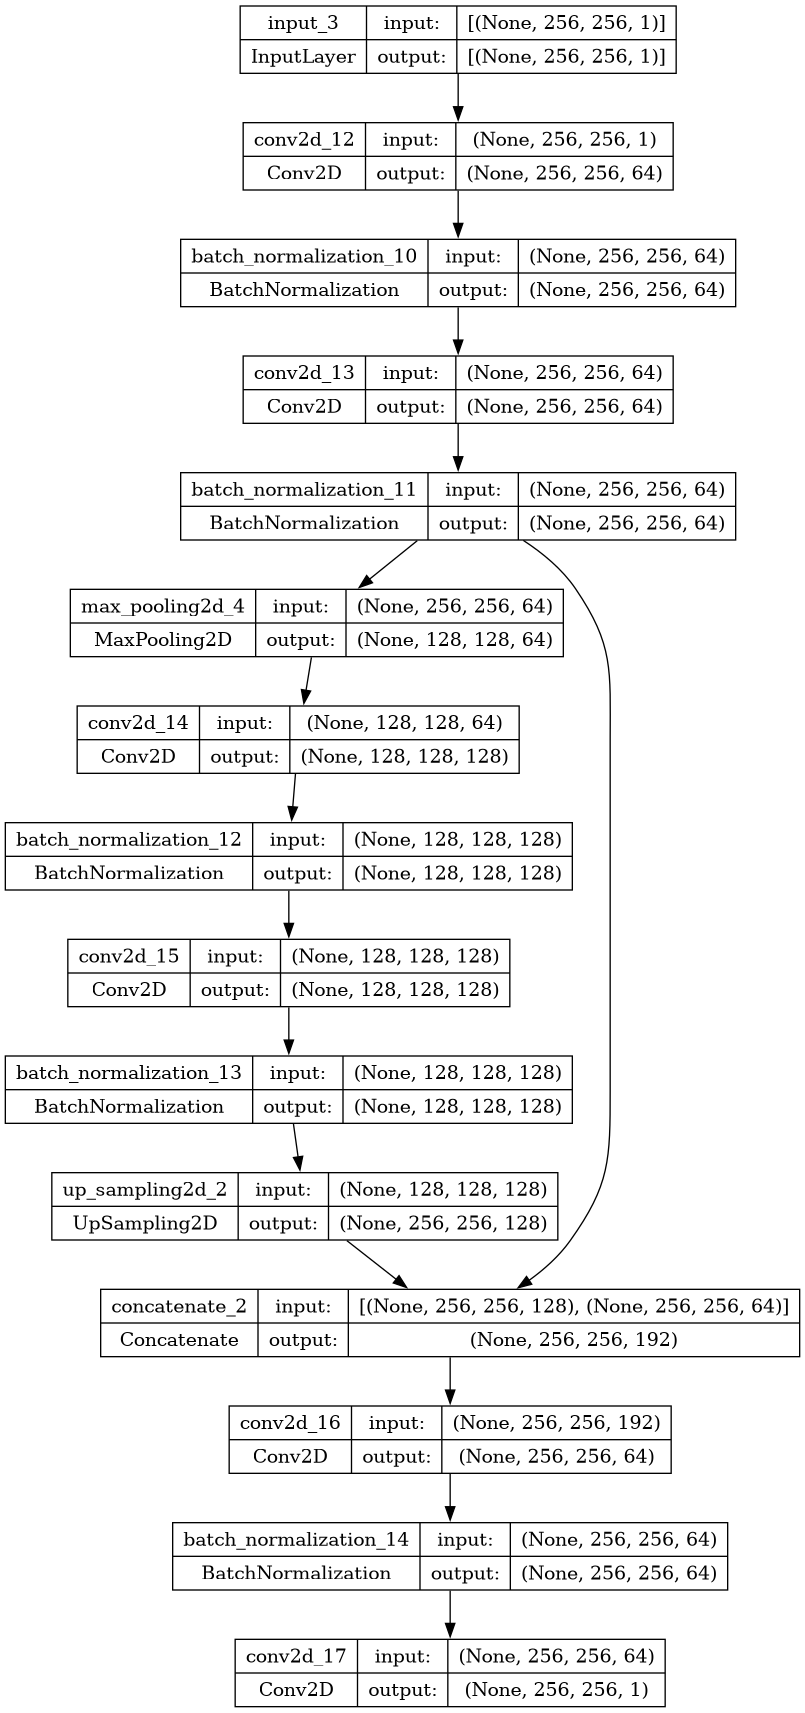

In [91]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [108]:
from sklearn.mixture import GaussianMixture

def apply_gmm_to_segmentation(segmented_images):
    refined_masks = []
    for image in segmented_images:
        gmm = GaussianMixture(n_components=2)
        image_reshaped = image.reshape(-1, 1)
        gmm.fit(image_reshaped)
        labels = gmm.predict(image_reshaped)
        refined_mask = labels.reshape(image.shape)
        refined_masks.append(refined_mask)
    return np.array(refined_masks)

# Example usage
segmented_test_masks = model.predict(y_test_masks)
refined_test_masks = apply_gmm_to_segmentation(segmented_test_masks)

7/7 [==============================] - 2s 320ms/step


In [118]:
# Use ROI masks as ground truth
y_test = y_test_masks

# Predict and binarize predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.float32)

# Ensure shapes match
print(f"x_roi_test shape: {X_test.shape}")
print(f"y_test shape: {y_test_masks.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Dice Coefficient Function
def dice_coefficient(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    intersection = np.sum(y_true_flat * y_pred_flat)
    return (2. * intersection) / (np.sum(y_true_flat) + np.sum(y_pred_flat))

# Calculate Dice Coefficient
dice = dice_coefficient(y_test, y_pred)
print(f"Dice Coefficient: {dice}")

7/7 [==============================] - 2s 318ms/step
x_roi_test shape: (221, 256, 256, 1)
y_test shape: (221, 256, 256, 1)
y_pred shape: (221, 256, 256, 1)
Dice Coefficient: 0.0027223654811075674


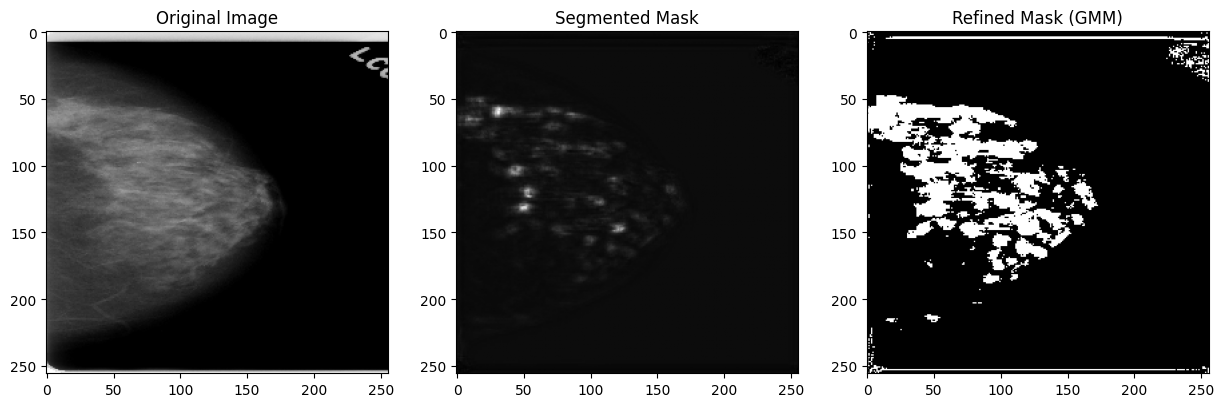

In [119]:
import matplotlib.pyplot as plt

def visualize_segmentation(image, mask, refined_mask):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze(), cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Segmented Mask")
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Refined Mask (GMM)")
    plt.imshow(refined_mask.squeeze(), cmap='gray')
    plt.show()

# Example
#visualize_segmentation(y_test_masks[0], segmented_test_masks[0], refined_test_masks[0])

visualize_segmentation(y_test[1], segmented_test_masks[1], refined_test_masks[1])

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

"""@tf.keras.utils.register_keras_serializable()
def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(K.sigmoid(y_pred))  # Force into [0,1]
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) /
                (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

@tf.keras.utils.register_keras_serializable()
def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return 0.3 * bce + 0.7 * d_loss  # Adjust weights if needed"""

@tf.keras.utils.register_keras_serializable()
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(K.round(y_pred))  # Binarize for metric
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('UNet++.keras', 
                   #custom_objects={'bce_dice_loss': bce_dice_loss}, 
                   compile=False)
model_name = "UNet++"

In [ ]:
# Compile the model before training
initial_learning_rate = 1e-4
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), 
              loss='binary_crossentropy',
              #loss=bce_dice_loss, 
              metrics=['accuracy', 
                       dice_coef
                        ])

In [ ]:
# Define a learning rate scheduler (if needed)
def lr_schedule(epoch):
    # Learning Rate Schedule
    lr = initial_learning_rate
    if epoch > 10:
        lr *= 0.1
    elif epoch > 5:
        lr *= 0.5
    return lr

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint directory and file name
checkpoint_filepath = '/scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-{epoch:02d}-{val_accuracy:.2f}.weights.h5'

# Create a ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
   monitor='val_loss',  # Monitor validation loss
   patience=5,  
   min_delta=0,  
   mode='max', 
   verbose=1,  
   restore_best_weights=True
)

Model Training

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.13.0
Num GPUs Available: 0


In [ ]:
foreground_ratio = np.sum(y_train_masks) / np.prod(y_train_masks.shape)
print("Foreground pixel ratio:", foreground_ratio)


Foreground pixel ratio: 0.004985534996300564


In [ ]:
batch_size = 8
max_epochs = 100 
num_iterations = 50

history = model.fit(X_train, y_train_masks, 
                    batch_size = batch_size, 
                    epochs=max_epochs, 
                    #steps_per_epoch=num_iterations,
                    validation_data=(X_test, y_test_masks), 
                    callbacks=[LearningRateScheduler(lr_schedule), early_stopping, model_checkpoint_callback],
                    shuffle=False)

Epoch 1/100
111/111 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9942 - dice_coef: 4.3137e-04
Epoch 1: val_accuracy improved from -inf to 0.99467, saving model to /scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-01-0.99.weights.h5
111/111 [==============================] - 256s 2s/step - loss: 0.0449 - accuracy: 0.9942 - dice_coef: 4.3137e-04 - val_loss: 0.0638 - val_accuracy: 0.9947 - val_dice_coef: 0.0027 - lr: 1.0000e-04
Epoch 2/100
111/111 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9948 - dice_coef: 0.0018
Epoch 2: val_accuracy improved from 0.99467 to 0.99472, saving model to /scratch/xxsi3290/Kaggle/Code/checkpoint_directory/model-02-0.99.weights.h5
111/111 [==============================] - 250s 2s/step - loss: 0.0314 - accuracy: 0.9948 - dice_coef: 0.0018 - val_loss: 0.0378 - val_accuracy: 0.9947 - val_dice_coef: 0.0014 - lr: 1.0000e-04
Epoch 3/100
111/111 [==============================] - ETA: 0s - loss: 0.0356 -

KeyboardInterrupt: 

In [ ]:
#Save the model for future use
model.save('UNet++.keras')


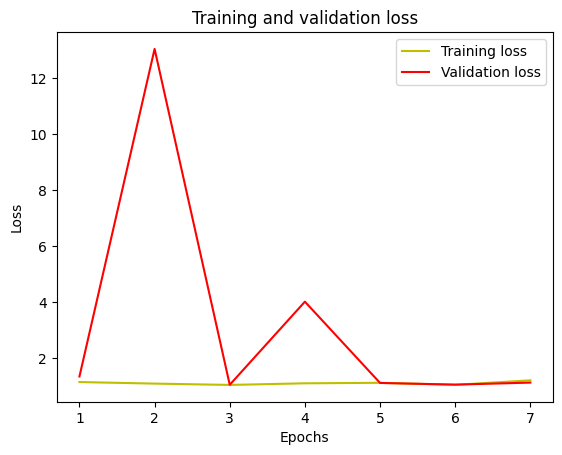

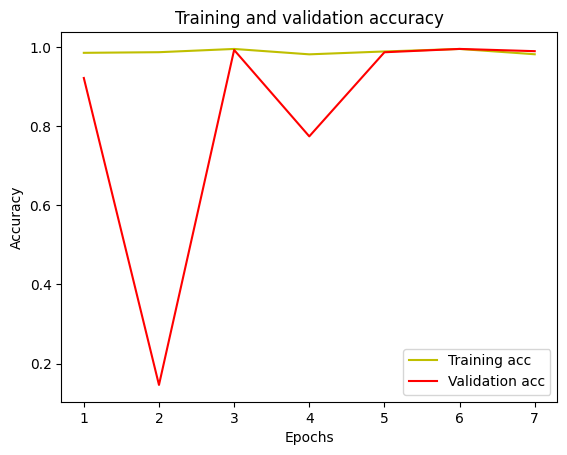

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation Dice Coefficient
dice = history.history['dice_coef']
val_dice = history.history['val_dice_coef']
plt.plot(epochs, dice, 'y', label='Training Dice Coefficient')
plt.plot(epochs, val_dice, 'r', label='Validation Dice Coefficient')
plt.title('Training and Validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('UNet++.keras', custom_objects={'bce_dice_loss': bce_dice_loss}, compile=False)
model_name = "UNet++"
        

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 16s 2s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test_masks)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.07389788


In [ ]:
# Calculate overall training and validation loss and accuracy
overall_train_loss = np.mean(loss)
overall_train_accuracy = np.mean(acc)
overall_val_loss = np.mean(val_loss)
overall_val_accuracy = np.mean(val_acc)
overall_train_dice = np.mean(dice)
overall_val_dice = np.mean(val_dice)

# Print the overall accuracy
print("Overall Training Loss:", overall_train_loss)
print("Overall Validation Loss:", overall_val_loss)
print("Overall Training Accuracy:", overall_train_accuracy)
print("Overall Validation Accuracy:", overall_val_accuracy)
print("Train Dice Coefficient:", overall_train_dice)
print("Validation Dice Coefficient:", overall_val_dice)

Overall Training Loss: 1.1102987698146276
Overall Validation Loss: 3.251141973904201
Overall Training Accuracy: 0.9873088853699821
Overall Validation Accuracy: 0.8291434815951756


(1, 256, 256, 3)
1/1 [==============================] - 0s 109ms/step
(256, 256)


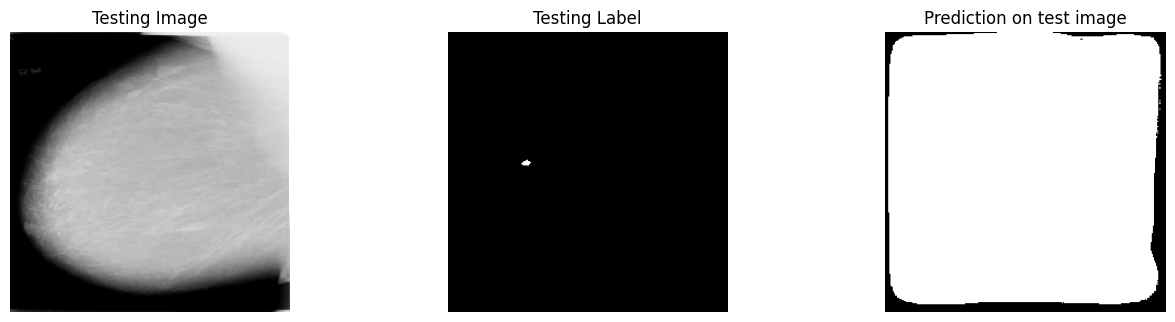

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test_masks[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))

plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(232)
plt.axis('off')
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.axis('off')

plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.axis('off')

plt.show()

Save all the results in file

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as img 

def save_evaluation_results(history, y_test_masks, y_pred_thresholded, output_directory):
    # Calculate mean IoU
    n_classes = 2
    IOU_keras = MeanIoU(num_classes=n_classes)
    IOU_keras.update_state(y_pred_thresholded, y_test_masks)
    mean_iou = IOU_keras.result().numpy()

    # Extract training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    dice = history.history['dice']
    val_dice = history.history['val_dice']

    # Calculate averages
    overall_train_loss = np.mean(loss)
    overall_val_loss = np.mean(val_loss)
    overall_train_accuracy = np.mean(acc)
    overall_val_accuracy = np.mean(val_acc)
    overall_train_dice = np.mean(dice)
    overall_val_dice = np.mean(val_dice)

    # Create results summary text
    results_text = f"""
Model Evaluation Results
------------------------
Mean IoU: {mean_iou:.4f}

Overall Training Loss: {overall_train_loss:.4f}
Overall Validation Loss: {overall_val_loss:.4f}
Overall Training Accuracy: {overall_train_accuracy:.4f}
Overall Validation Accuracy: {overall_val_accuracy:.4f}
Overall Train Dice Coefficient: {overall_train_dice: .4f}
Overall Validation Dice Coefficient: {overall_val_dice: .4f}
"""

    # Save results to file in the same directory as predictions
    results_file_path = os.path.join(output_directory, "model_evaluation_results.txt")
    with open(results_file_path, "w") as f:
        f.write(results_text)

    print(f"Saved evaluation results to {results_file_path}")

# Function to save individual test image prediction results
def save_predictions(test_img, ground_truth, prediction, output_directory, sample_id):
    plt.figure(figsize=(16, 8))

    # Original Test Image
    plt.subplot(1, 3, 1)
    plt.title('Testing Image')
    plt.imshow(test_img[:, :, 0], cmap='gray')
    plt.axis('off')

    # Ground Truth Mask
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth')
    plt.imshow(ground_truth[:, :, 0], cmap='gray')
    plt.axis('off')

    # Model Prediction
    plt.subplot(1, 3, 3)
    plt.title('Prediction')
    plt.imshow(prediction, cmap='gray')
    plt.axis('off')

    filename = os.path.join(output_directory, f"prediction_sample_{sample_id}.png")
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print(f"Saved prediction result to {filename}")

def save_loss_accuracy_plots(history, output_directory, model, model_name):
    """Function to save loss and accuracy plots during training."""
    # Extract loss and accuracy data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    dice = history.history['dice_coef']
    val_dice = history.history['val_dice_coef']
    
    # Define the epochs
    epochs = range(1, len(loss) + 1)

    # Save training and validation loss plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    loss_plot_path = os.path.join(output_directory, "loss_plot.png")
    plt.savefig(loss_plot_path)
    plt.close()
    print(f"Saved loss plot to {loss_plot_path}")

    # Save training and validation accuracy plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, 'y', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    acc_plot_path = os.path.join(output_directory, "accuracy_plot.png")
    plt.savefig(acc_plot_path)
    plt.close()
    print(f"Saved accuracy plot to {acc_plot_path}")
    
    # Plot the training and validation Dice Coefficient
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, dice, 'y', label='Training Dice Coefficient')
    plt.plot(epochs, val_dice, 'r', label='Validation Dice Coefficient')
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice Coefficient')
    plt.legend()
    plt.show()
    dice_plot_path = os.path.join(output_directory, "dice_coeff_plot.png")
    plt.savefig(dice_plot_path)
    plt.close()
    print(f"Saved accuracy plot to {dice_plot_path}")
    
    # Save model architecture image
    filename = f"{model_name}_architecture.png"
    tf.keras.utils.plot_model(model, to_file=filename, show_shapes=True)

    # Reload and display image with model name on top
    img = mpimg.imread(filename)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.title(model_name, fontsize=18)
    plt.savefig(f"{model_name}_annotated.png", bbox_inches='tight')
    model = os.path.join(output_directory, f"{model_name}_architecture.png")
    plt.savefig(model)
    plt.close()
    print(f"Saved accuracy plot to {model}")

def show_predictions(X_test, y_test_masks, model, history, num=1):
    """Function to process test images, save results and plot training history"""
    # Define the output directory for saving images and plots
    parent_dir = os.path.abspath("/scratch/xxsi3290/Kaggle/Segmentation_results")
    file_time = time.strftime('%Y%m%d_%H%M%S')
    output_directory = os.path.join(parent_dir, f"{file_time}_new_UNET_Segmentation")

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        print(f"Created directory: {output_directory}")
    else:
        print(f"Saving to existing directory: {output_directory}")

    # Step 1: Save the loss and accuracy plots
    save_loss_accuracy_plots(history, output_directory, model, model_name)
    
    # Step 2: Save mIoU, accuracy, and loss in txt file
    save_evaluation_results(history, y_test_masks, y_pred_thresholded, output_directory)

    # Step 3: Save predictions
    sample_id = 0
    for _ in range(num):
        test_img_number = random.randint(0, len(X_test) - 1)  # Random image number
        test_img = X_test[test_img_number]
        ground_truth = y_test_masks[test_img_number]

        test_img_input = np.expand_dims(test_img, 0)  # Add batch dimension
        prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)  # Apply threshold

        # Save the results for this test image
        save_predictions(test_img, ground_truth, prediction, output_directory, sample_id)
        sample_id += 1

# Example usage
# Assuming X_test and y_test_masks are already loaded and the model is compiled
show_predictions(X_test, y_test_masks, model, history, num=30)  # Adjust 'num' for more or fewer samples


Created directory: /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation
Saved loss plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/loss_plot.png
Saved accuracy plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/accuracy_plot.png
Saved accuracy plot to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/UNet++_architecture.png
Saved evaluation results to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/model_evaluation_results.txt
1/1 [==============================] - 0s 113ms/step
Saved prediction result to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/prediction_sample_0.png
1/1 [==============================] - 0s 119ms/step
Saved prediction result to /scratch/xxsi3290/Kaggle/Segmentation_results/20250514_120810_new_UNET_Segmentation/prediction_sample_1.png
1/1 [==